In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "air_quality.csv"
df = pd.read_csv(path)

#Extract date and hour
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

AQI/PM2.5 along days, each day is a line


Hà Nội: Đại Học Bách Khoa cổng Parabol đường Giải Phóng (KK) 


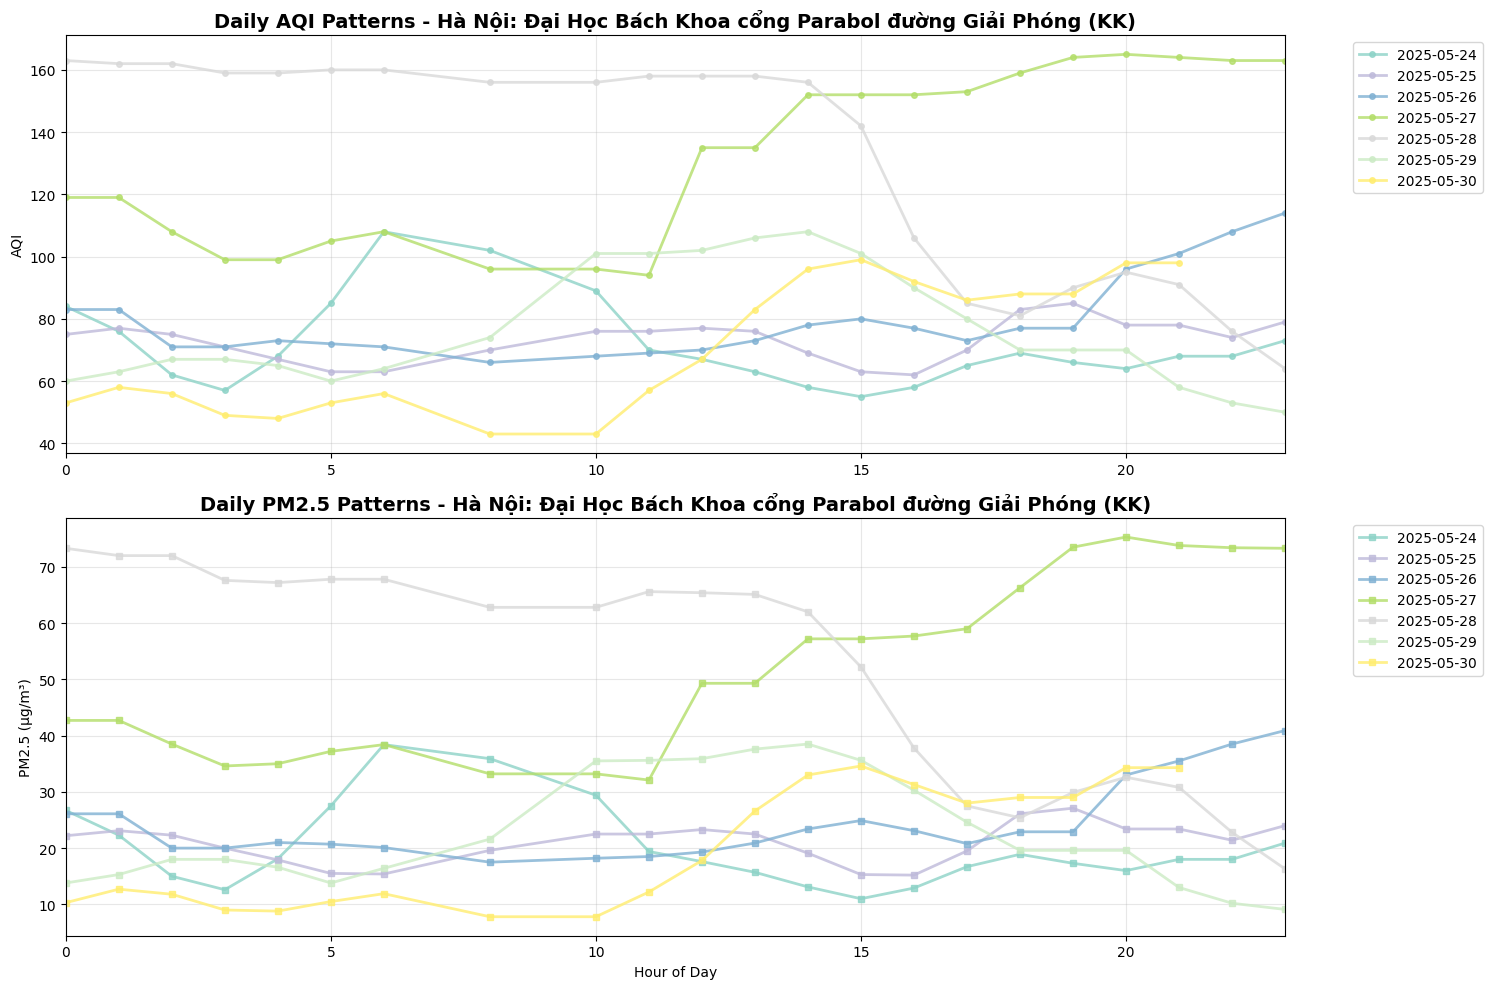


Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuất Duy Tiến (KK) 


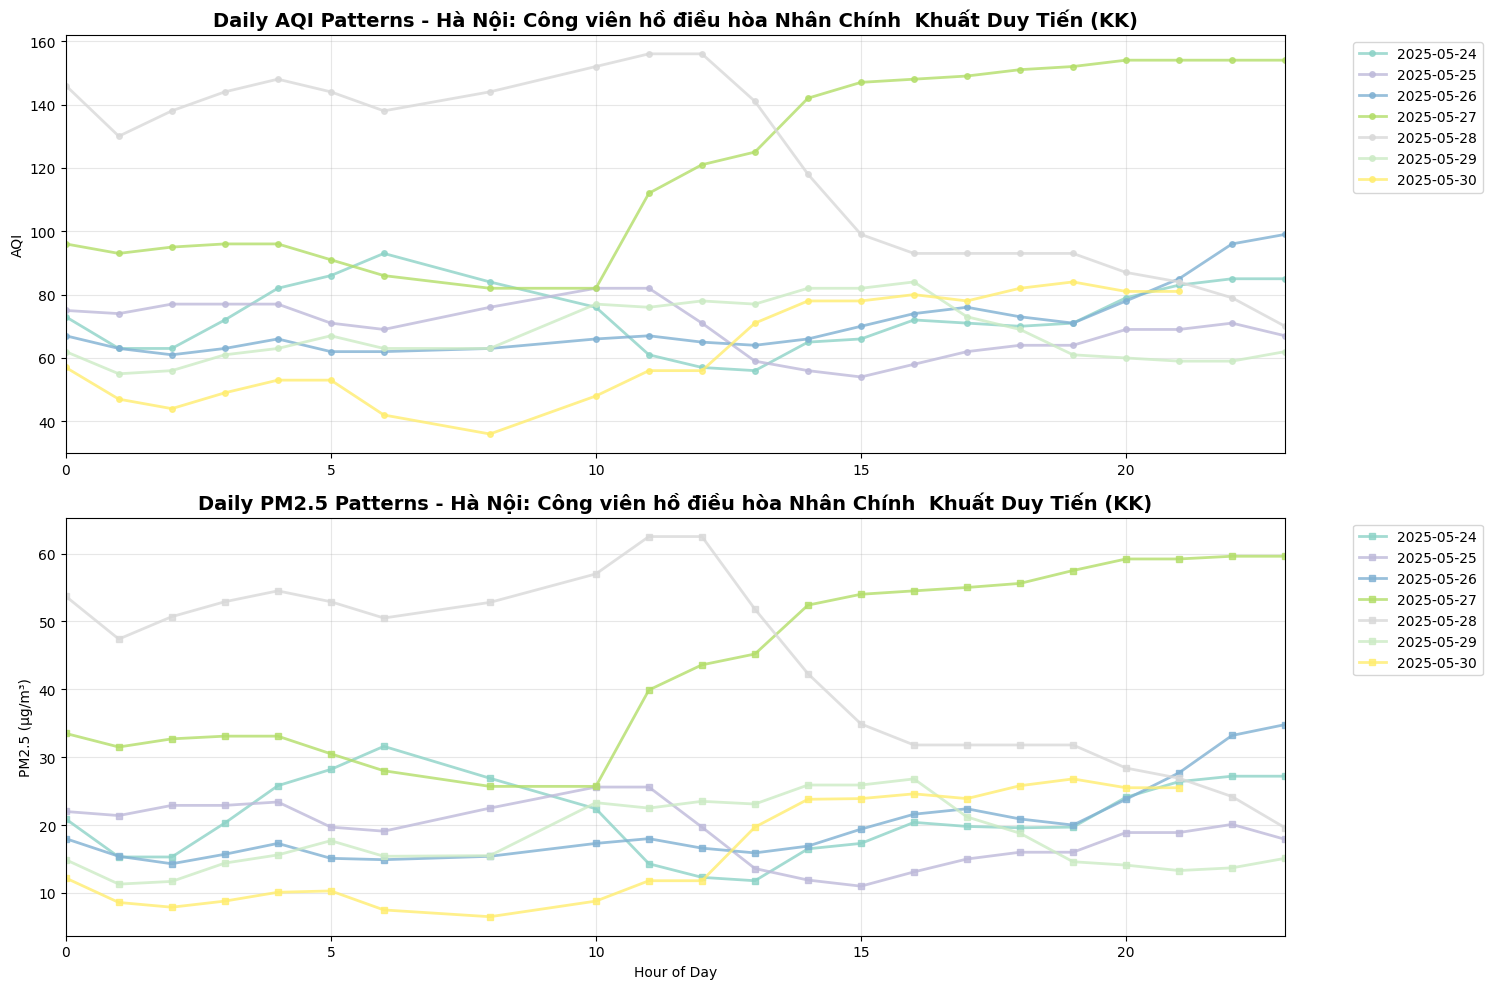


Minh Khai - Bắc Từ Liêm 


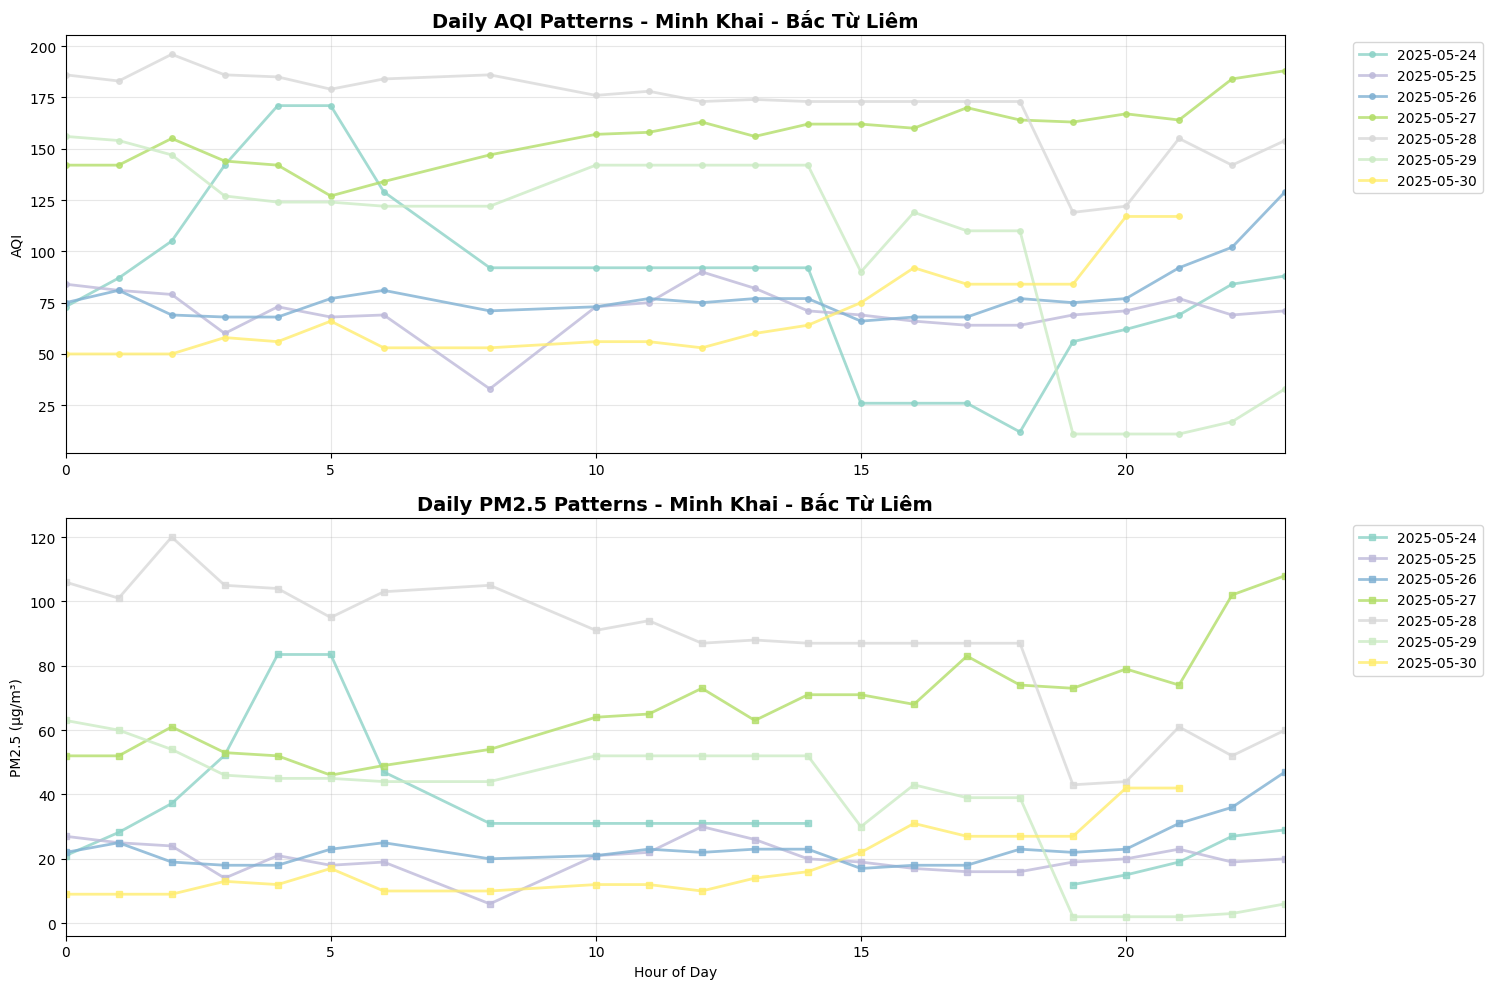


Vũng Tàu: Ngã tư Giếng nước - Tp.Vũng Tàu (KK) 


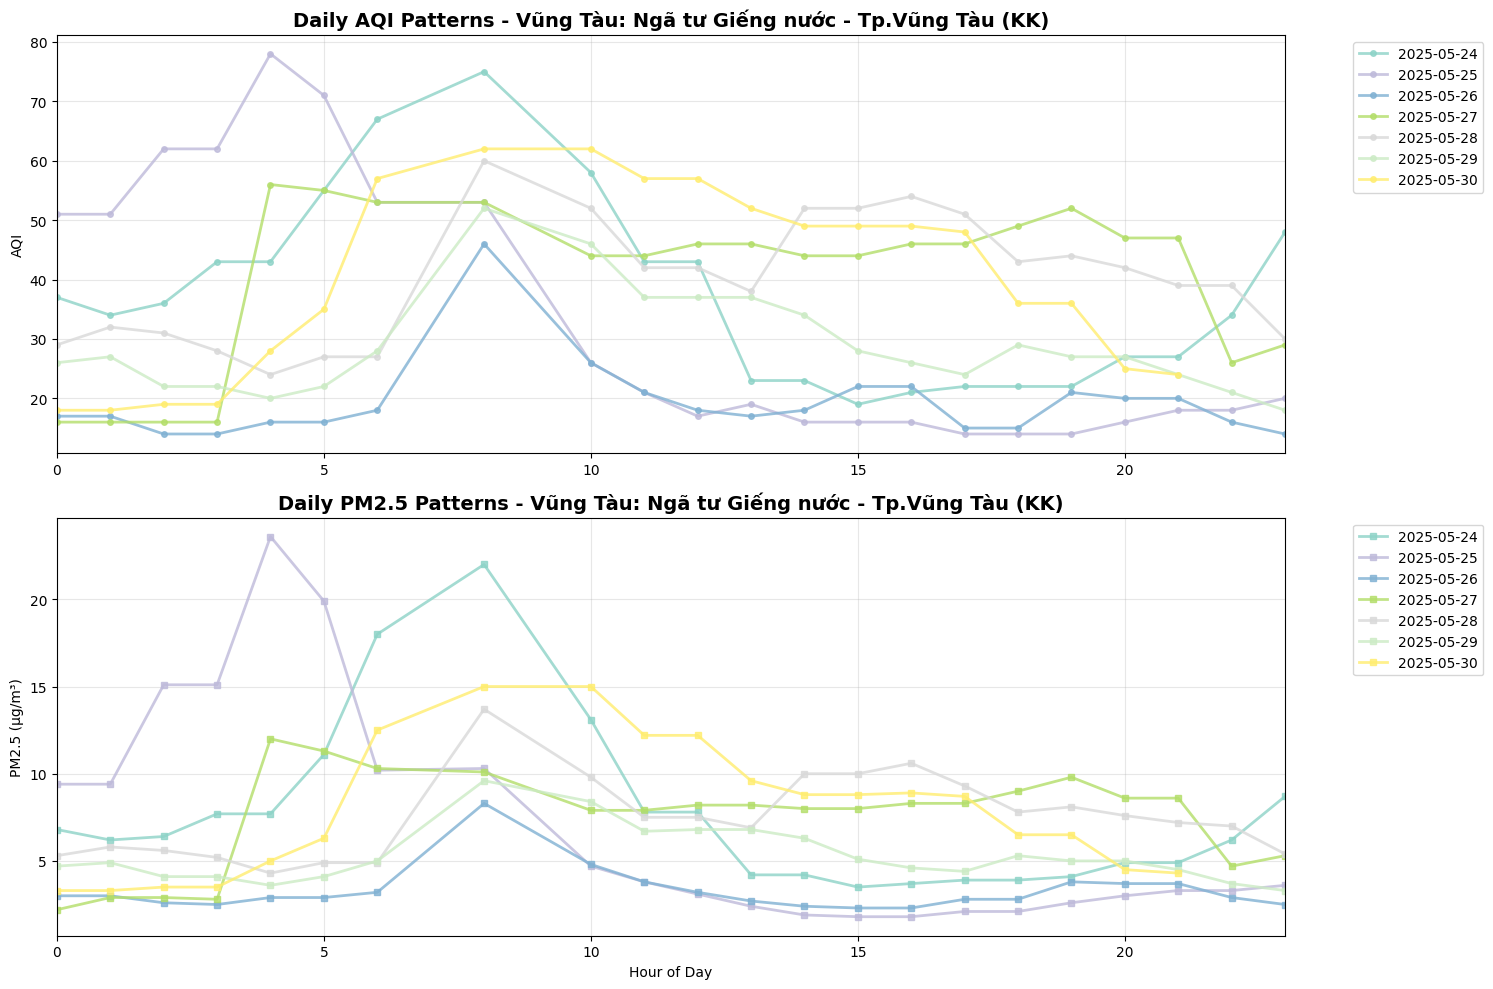


Hải Dương: UBND TP. Hải Dương - 106 Đường Trần Hưng Đạo (KK) 


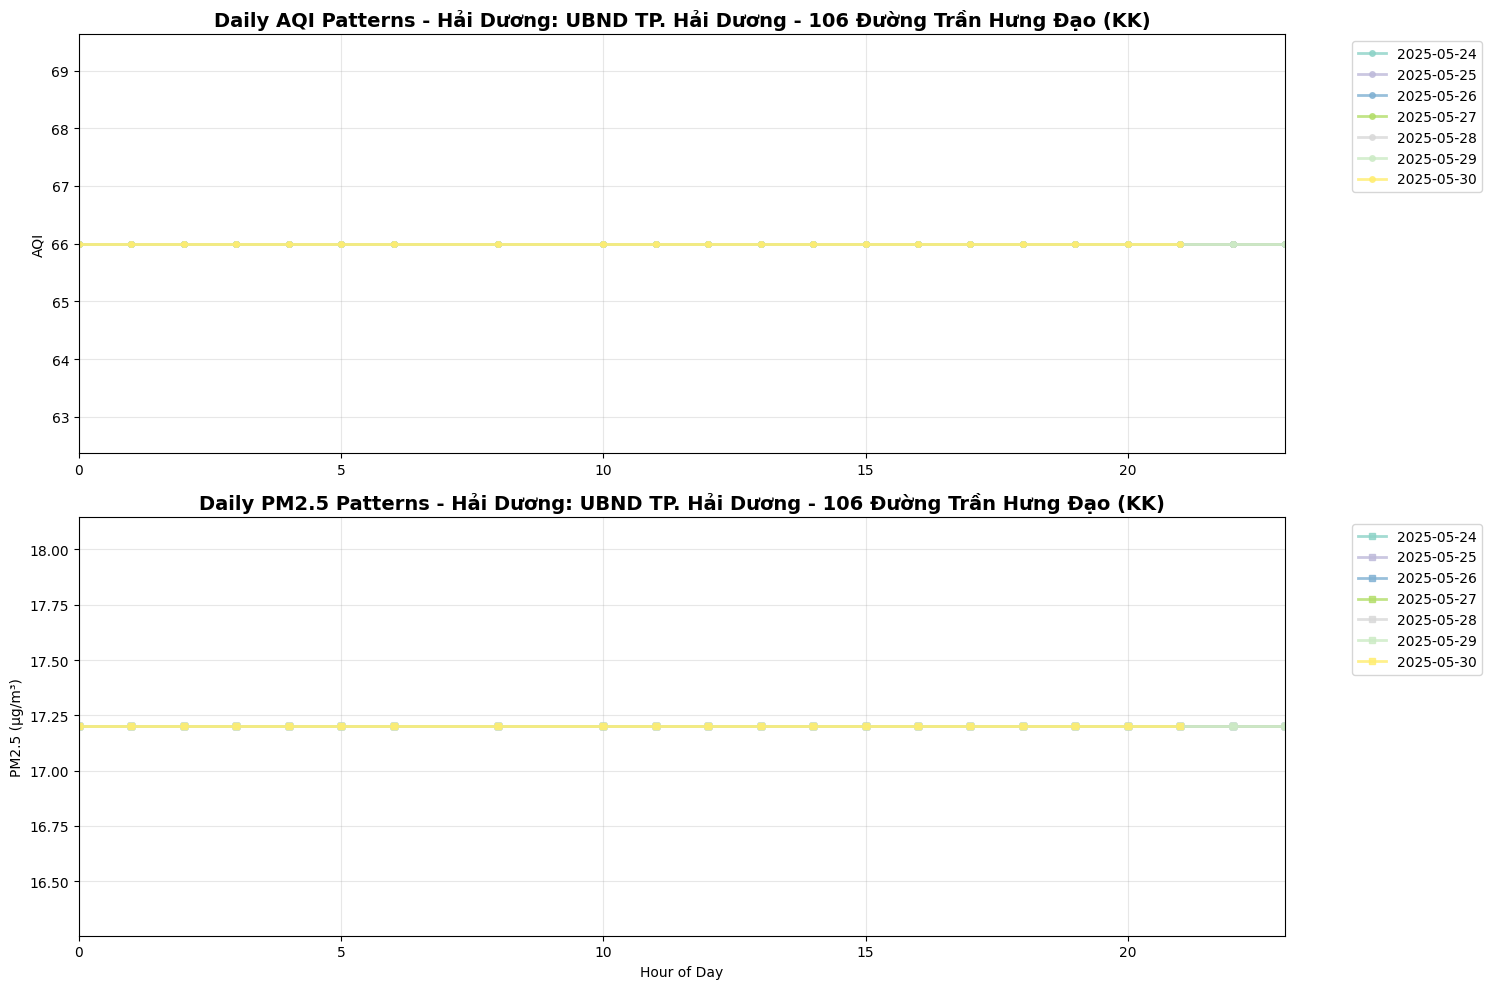


Thừa Thiên Huế: 83 đường Hùng Vương (KK) 


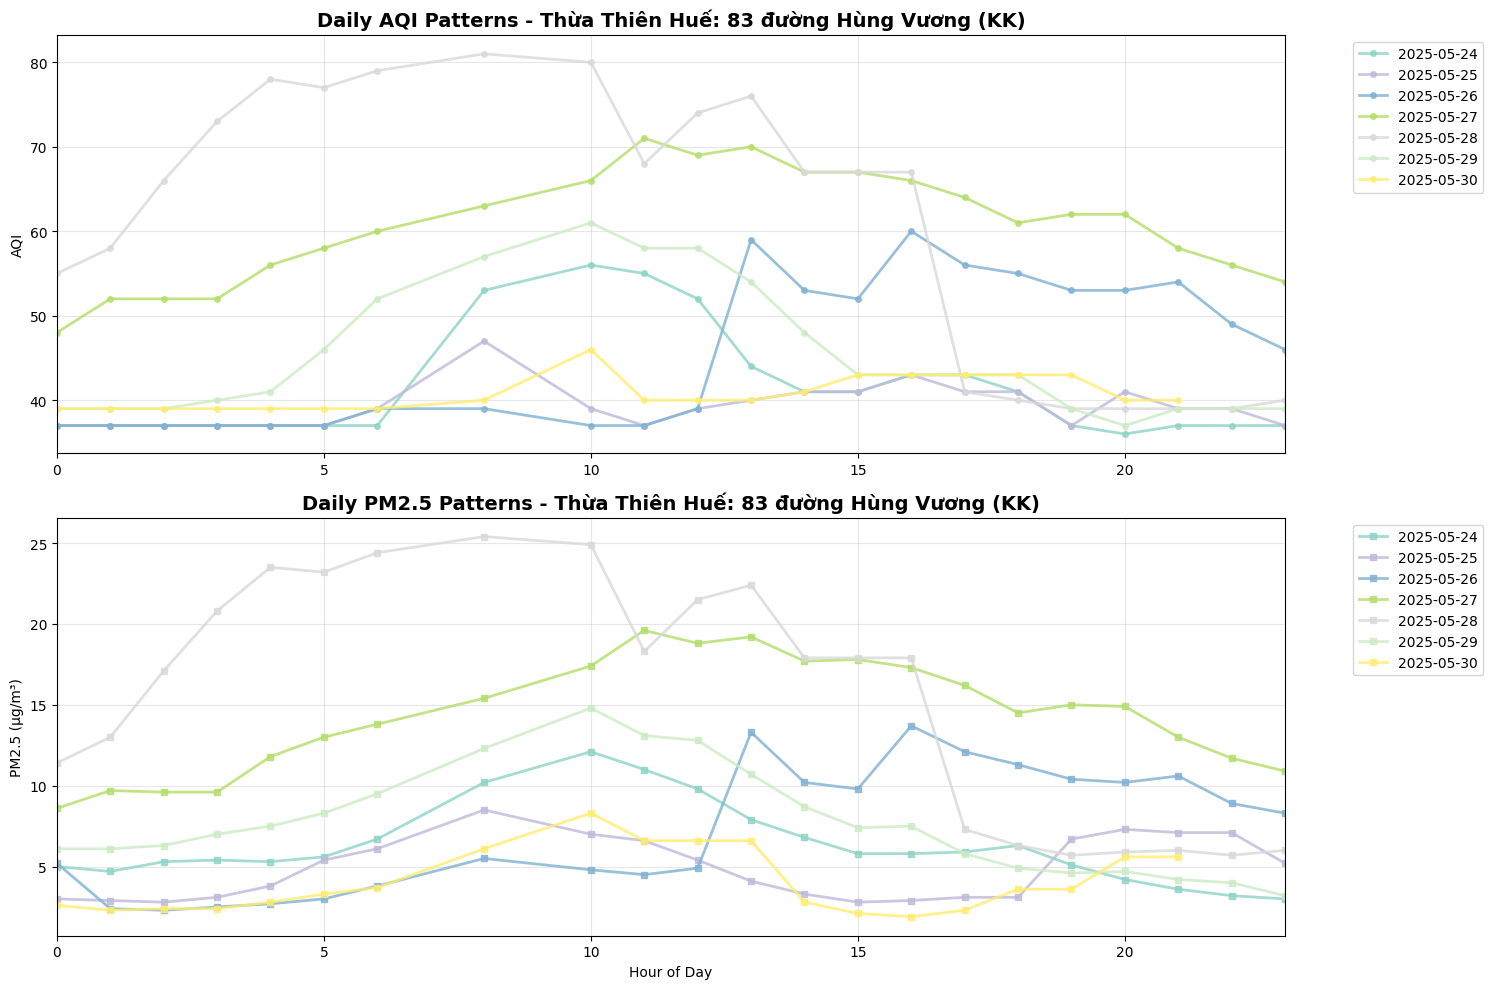


Thái Bình: Cầu Thái Bình - Đ. Trần Thái Tông - P. Bồ Xuyên - TP Thái Bình (KK) 


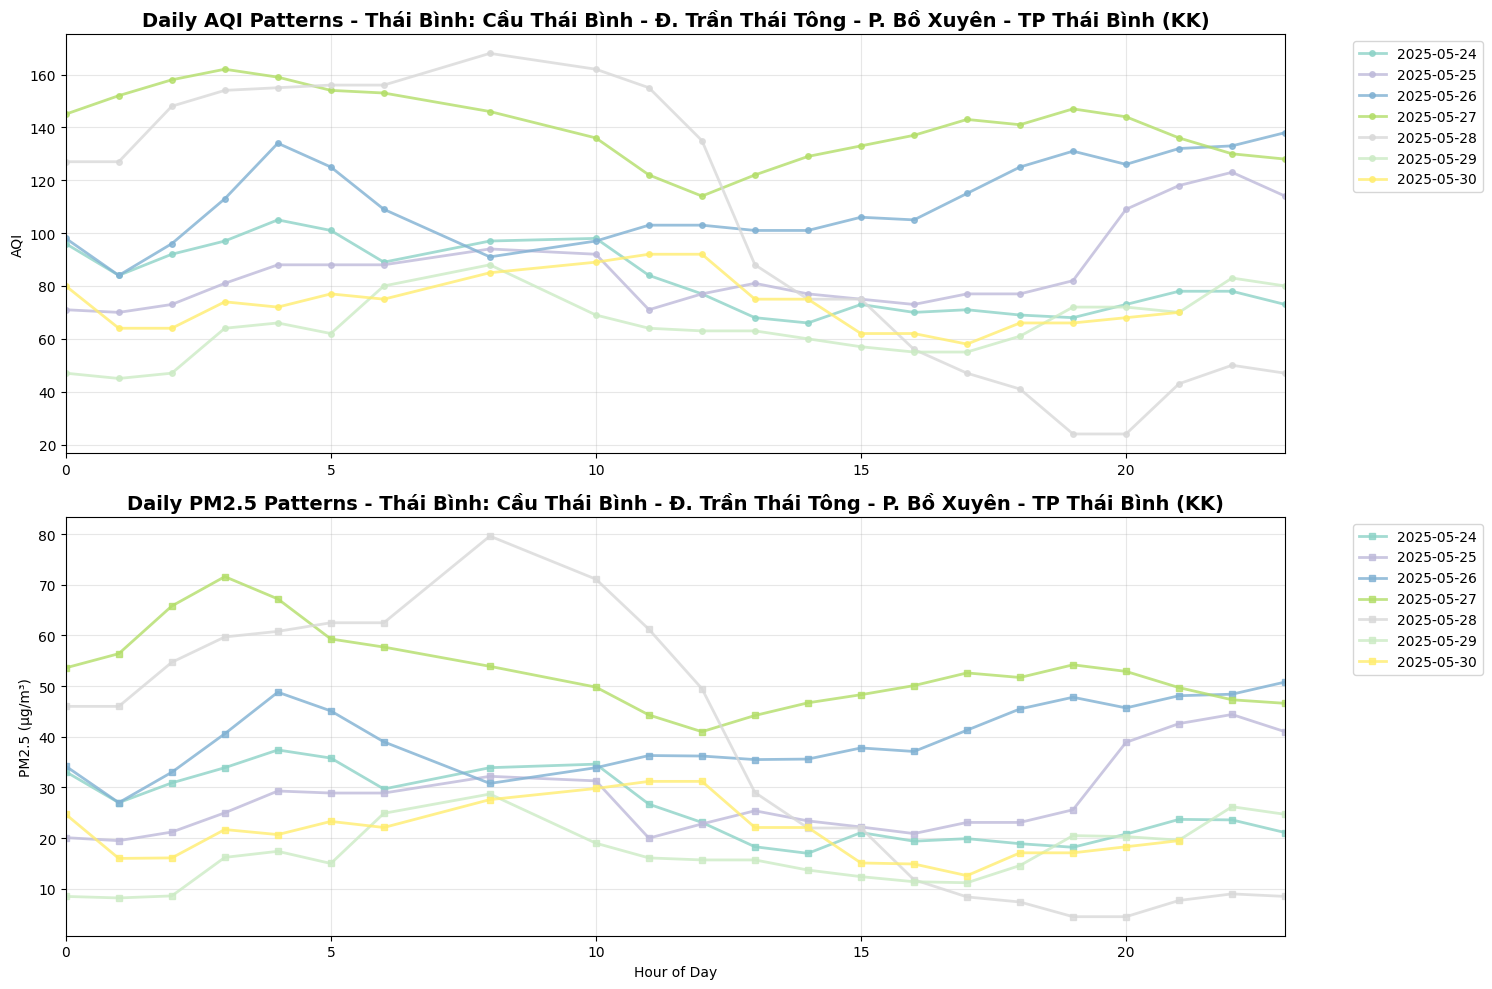


Thái nguyên: Đường Hùng Vương - Tp Thái Nguyên (KK) 


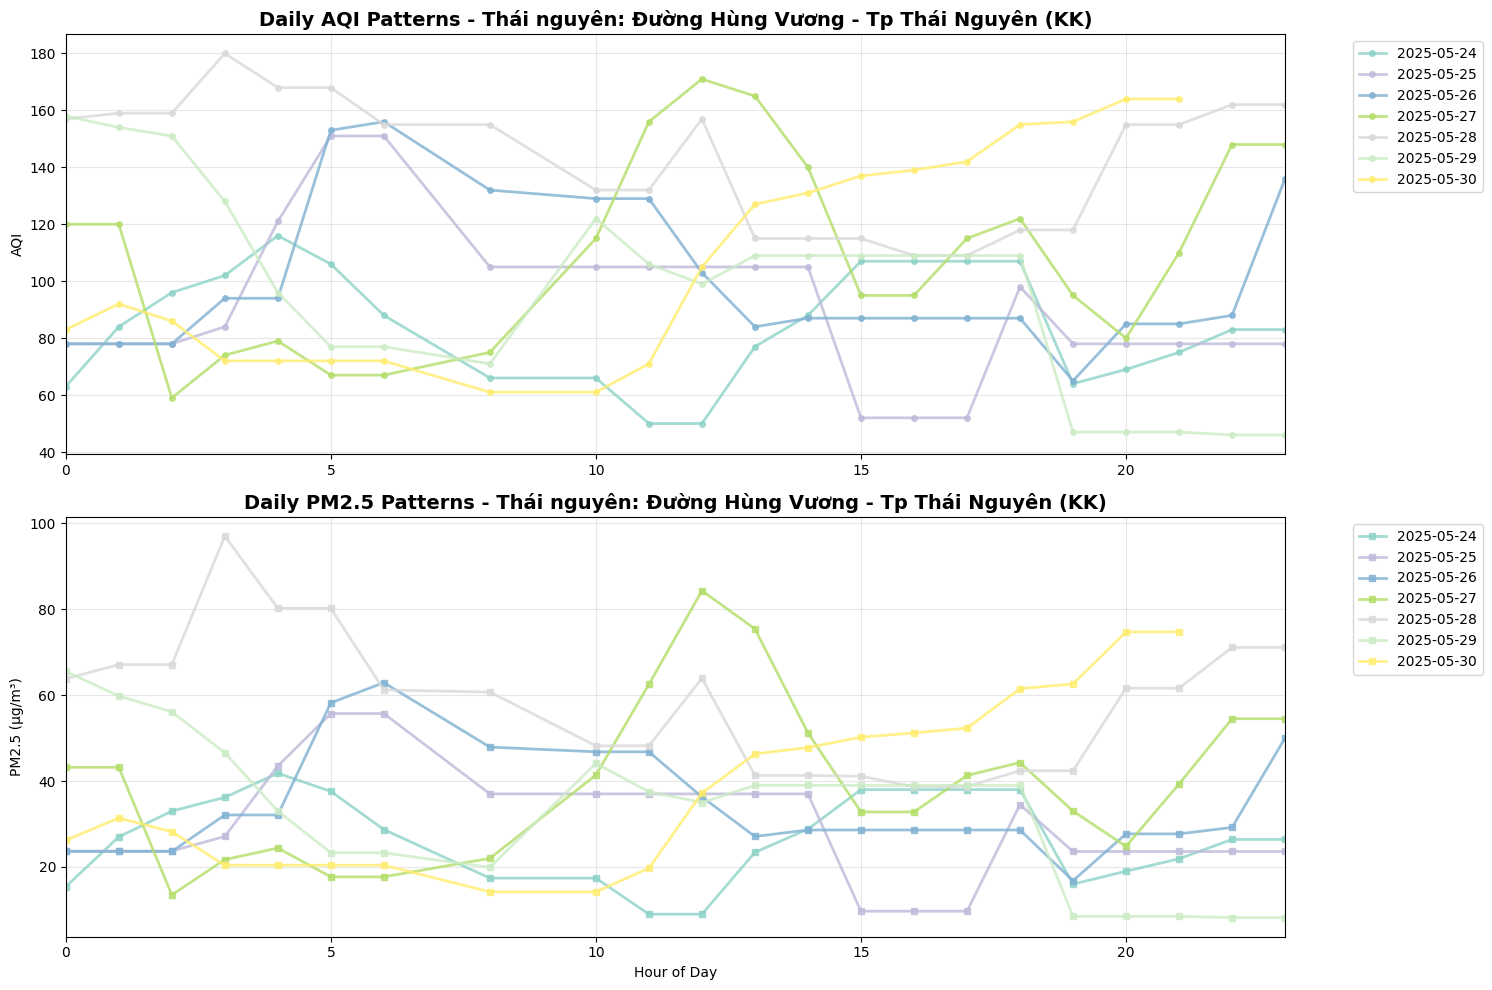


Quảng Bình: Khu kinh tế Hòn La (KK) 


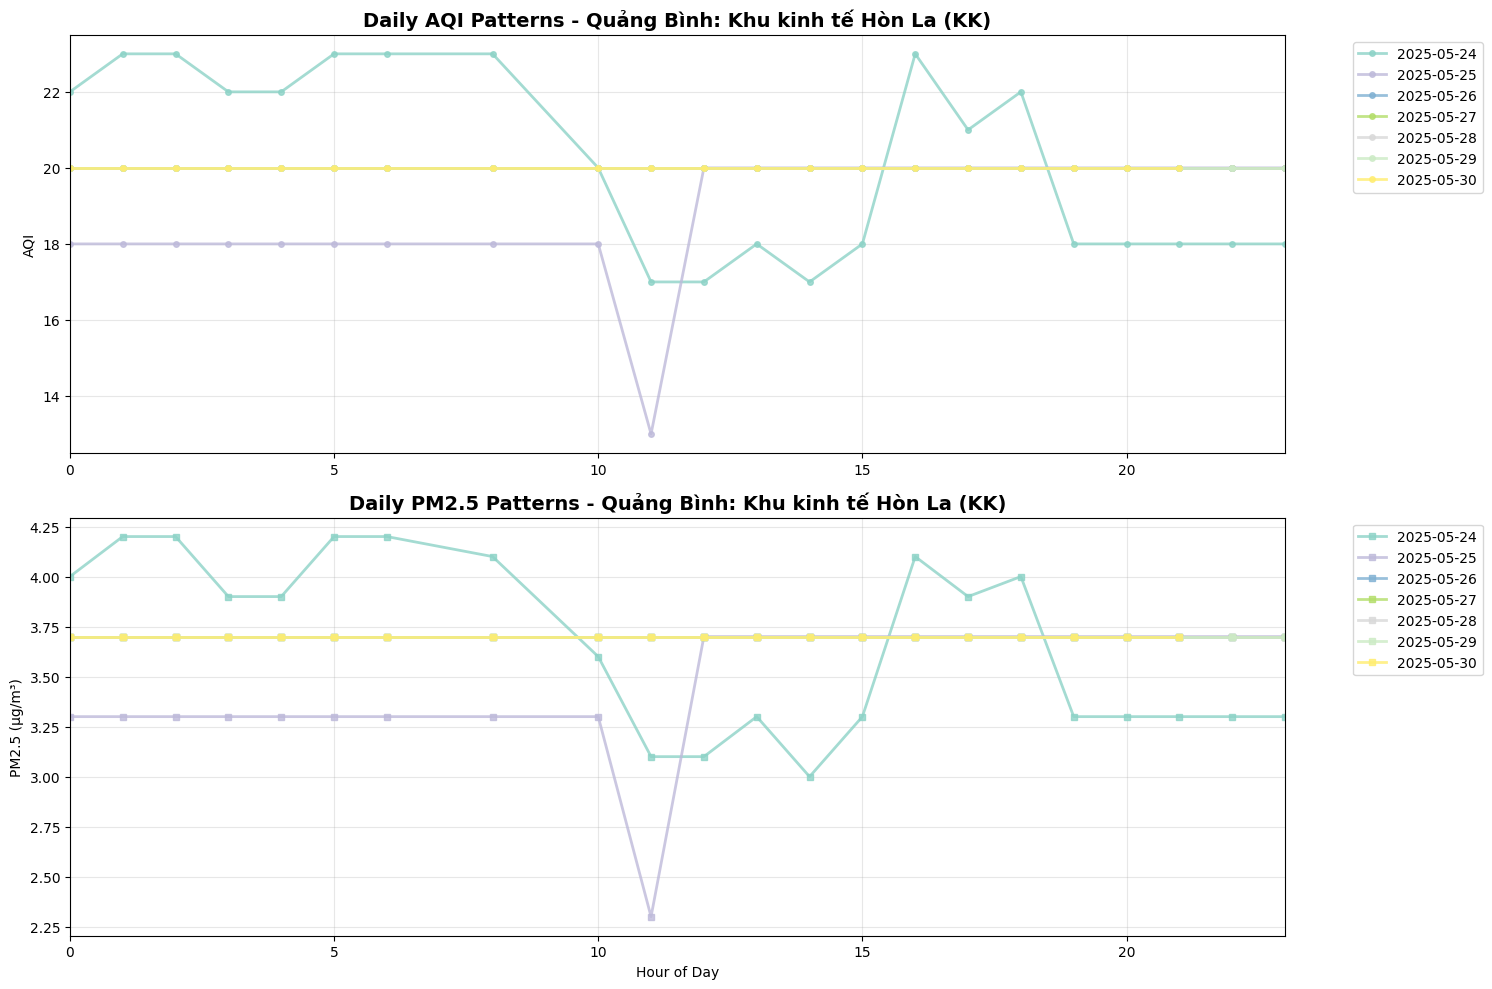


Trà Vinh: Tp. Trà Vinh (KK) 


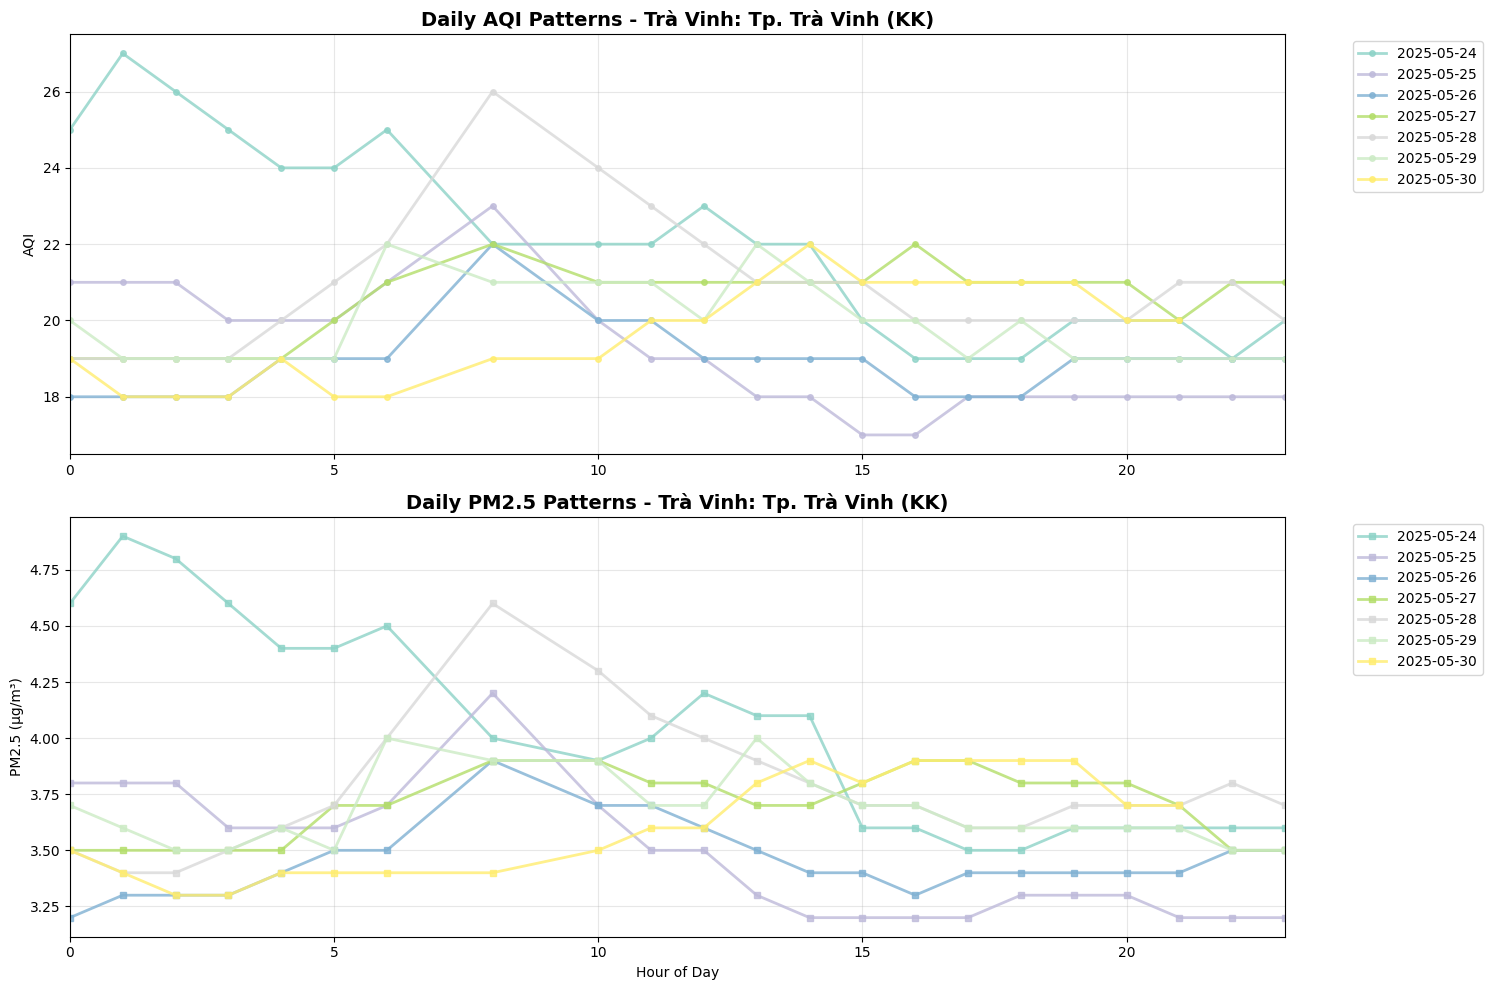


Hà Nội: Chi cục BVMT (KK) 


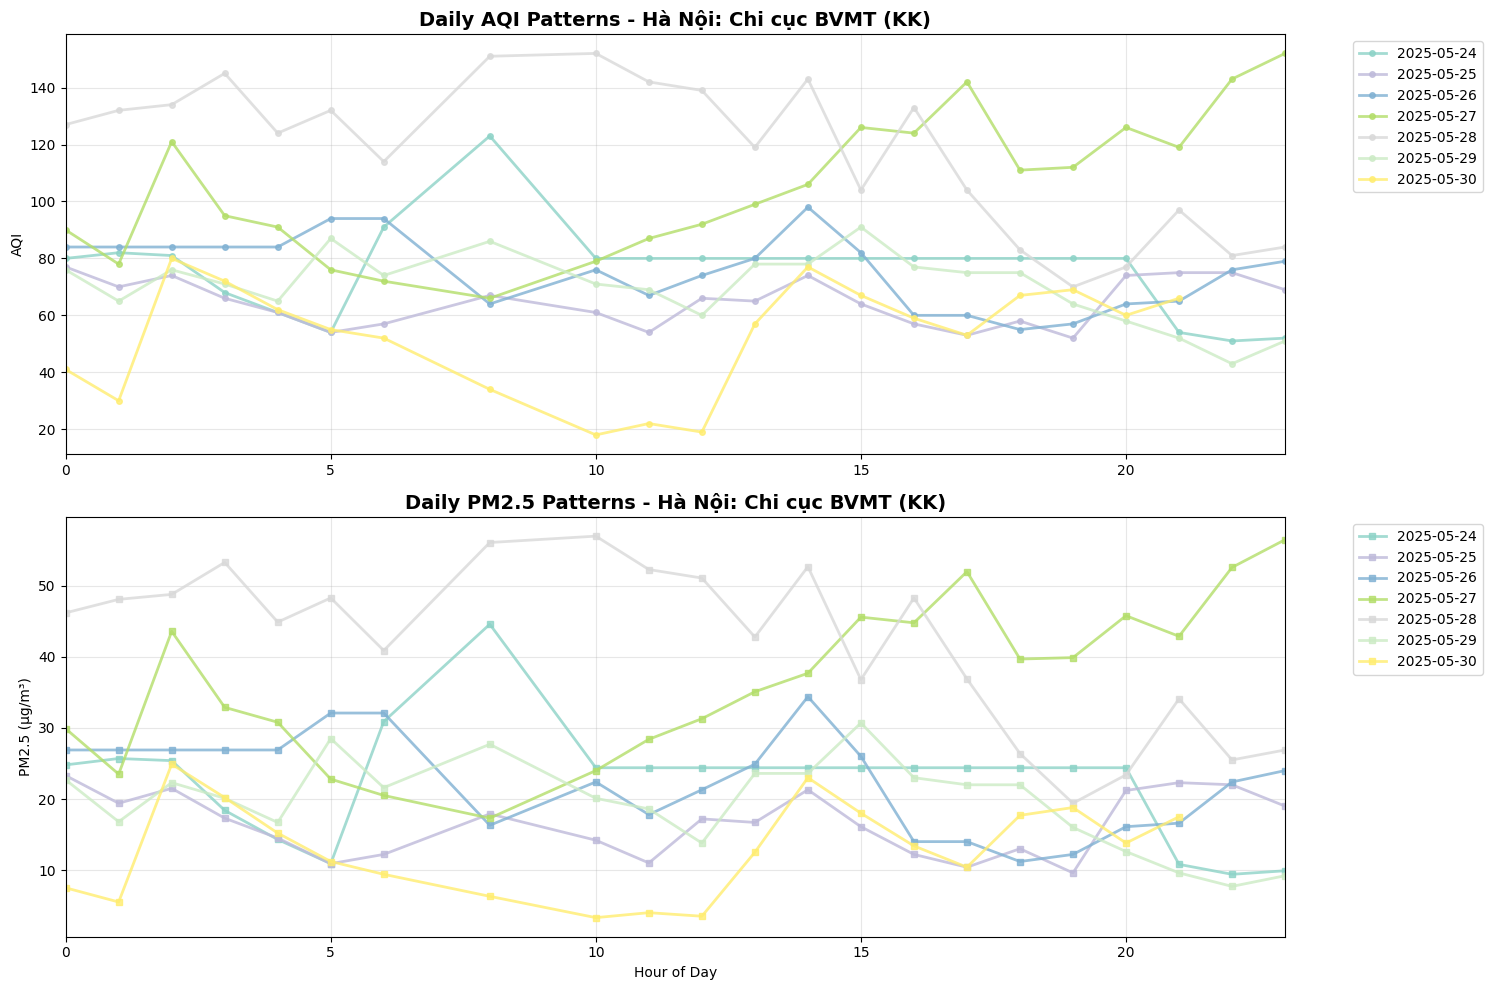


IQAir Ha Noi 


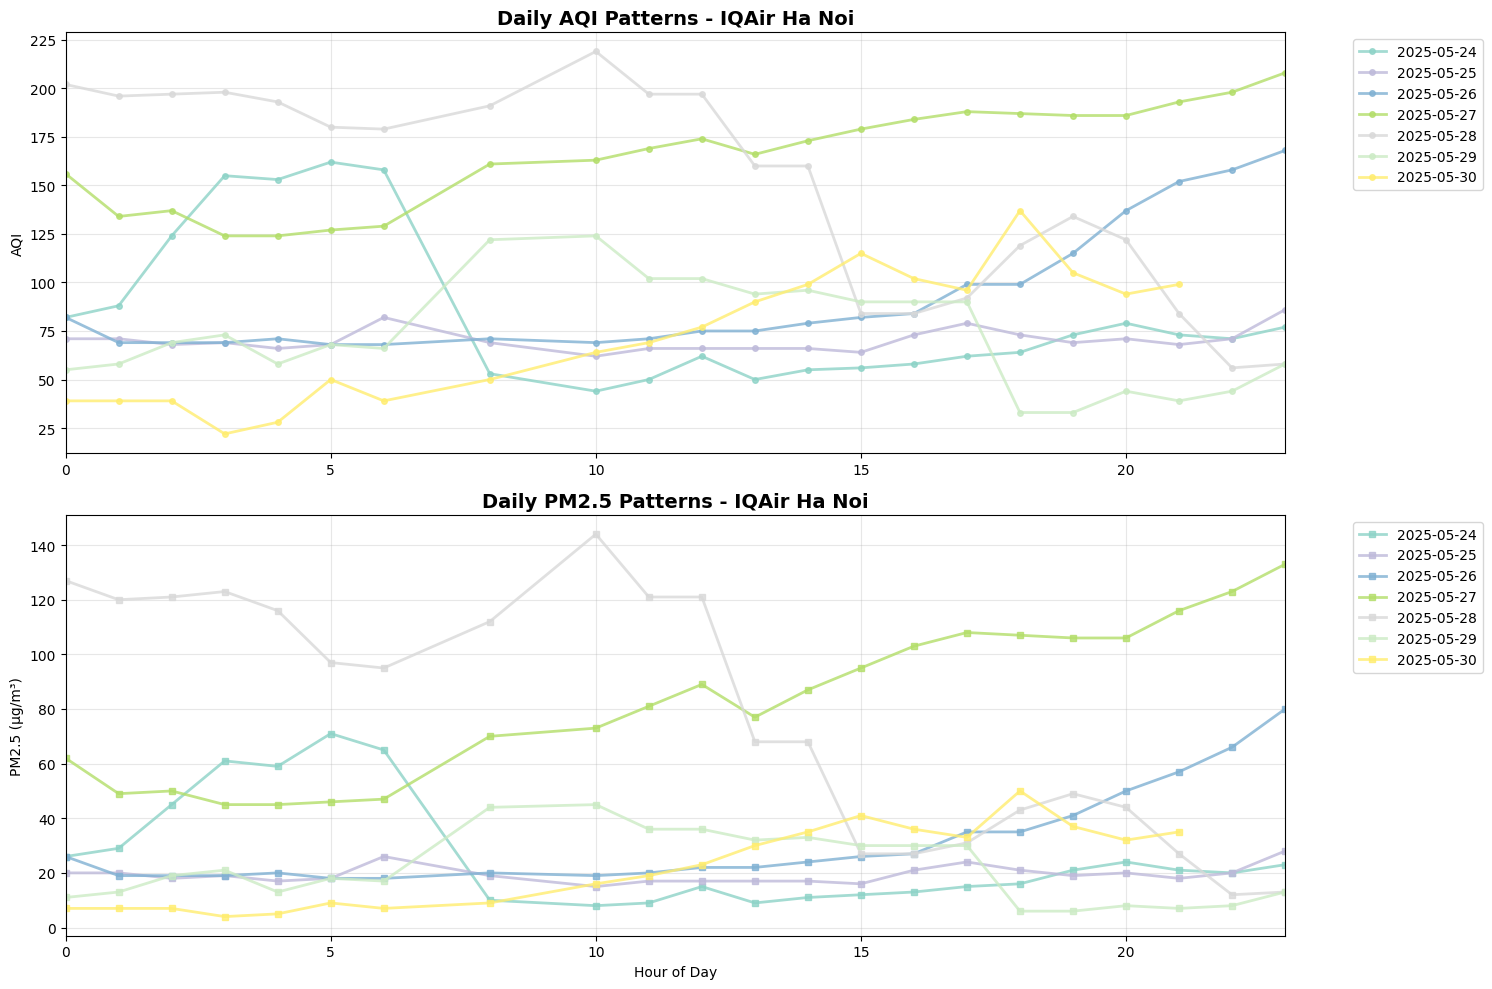


FPT 


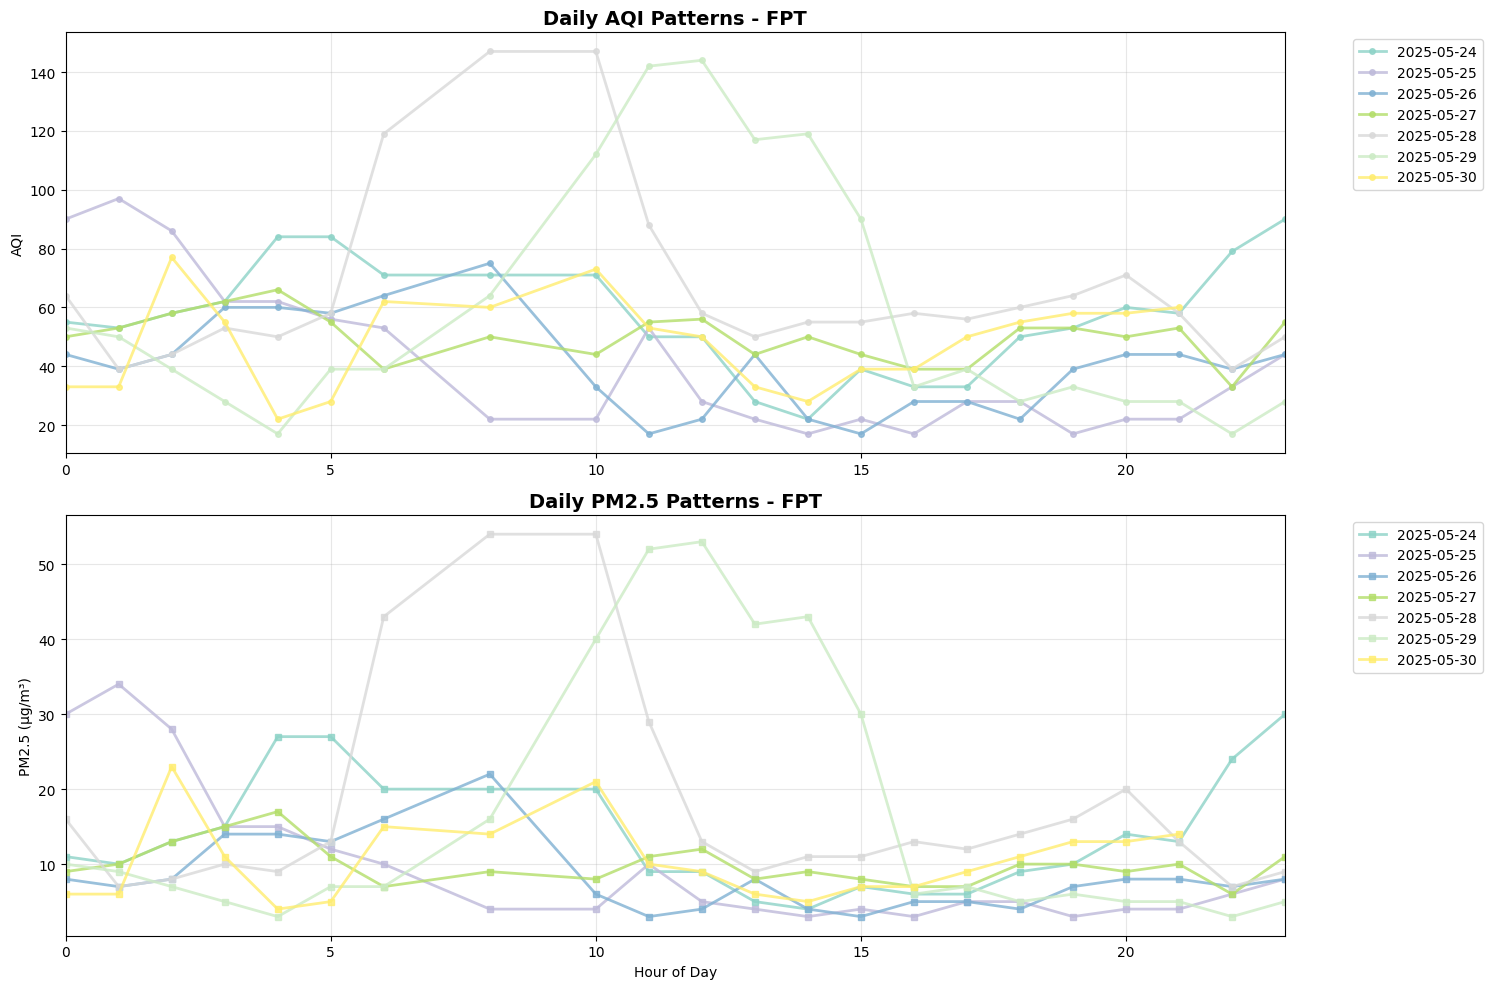


Hà Nội: TT giao lưu văn hóa phố cổ - Hoàn Kiếm - Trạm cảm biến(KK) 


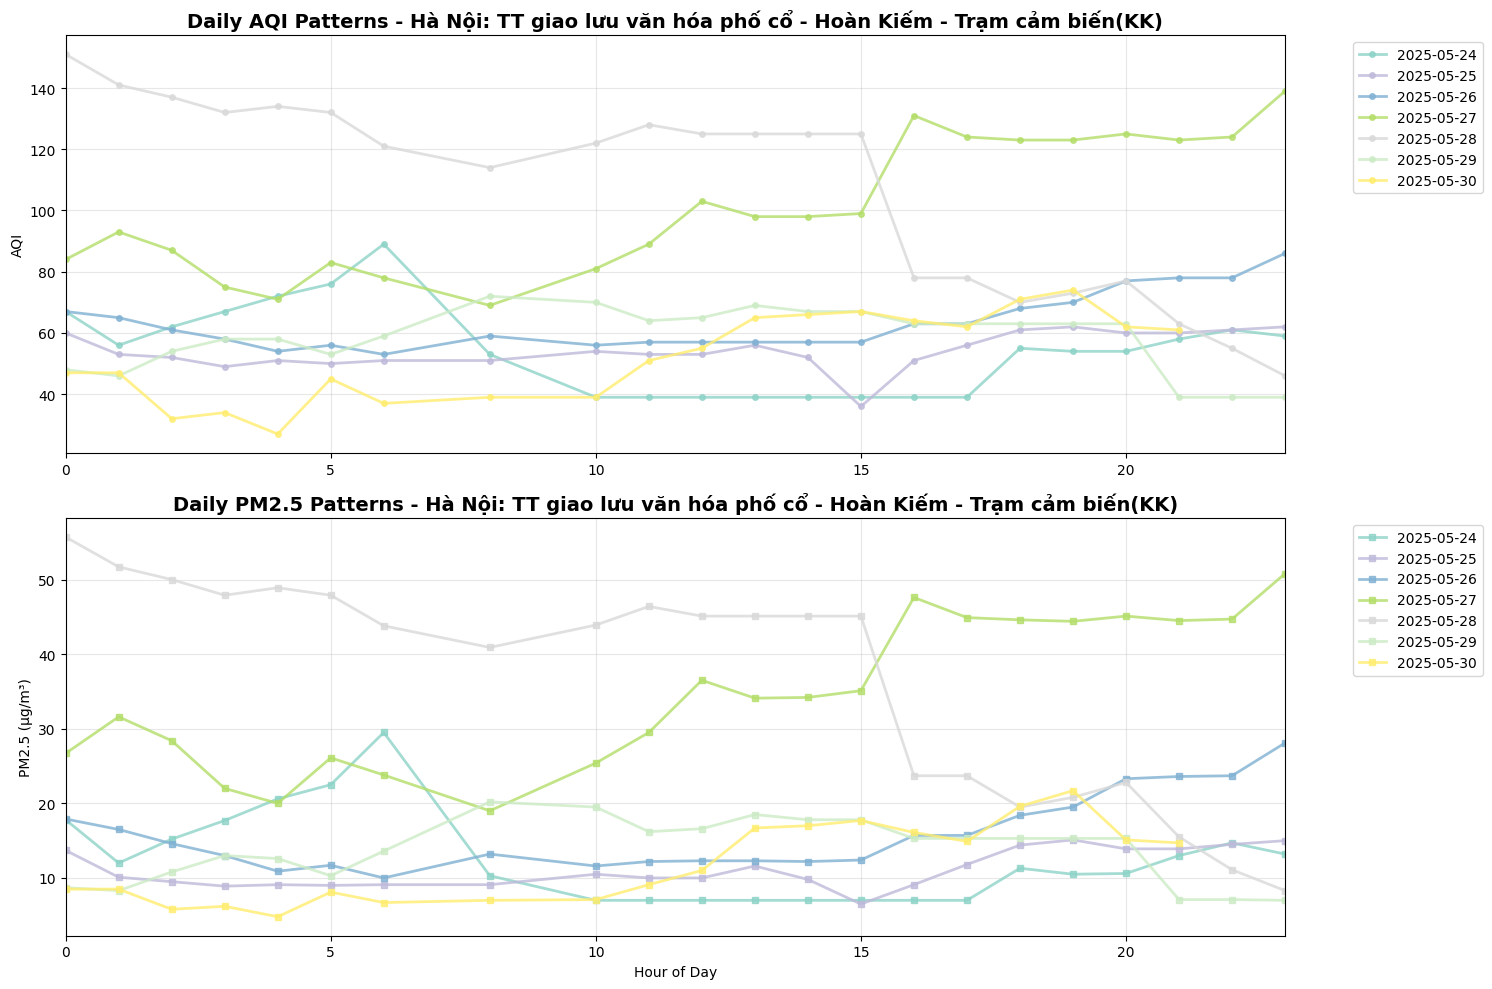


IQAir Vietnam - Saigon Pearl 


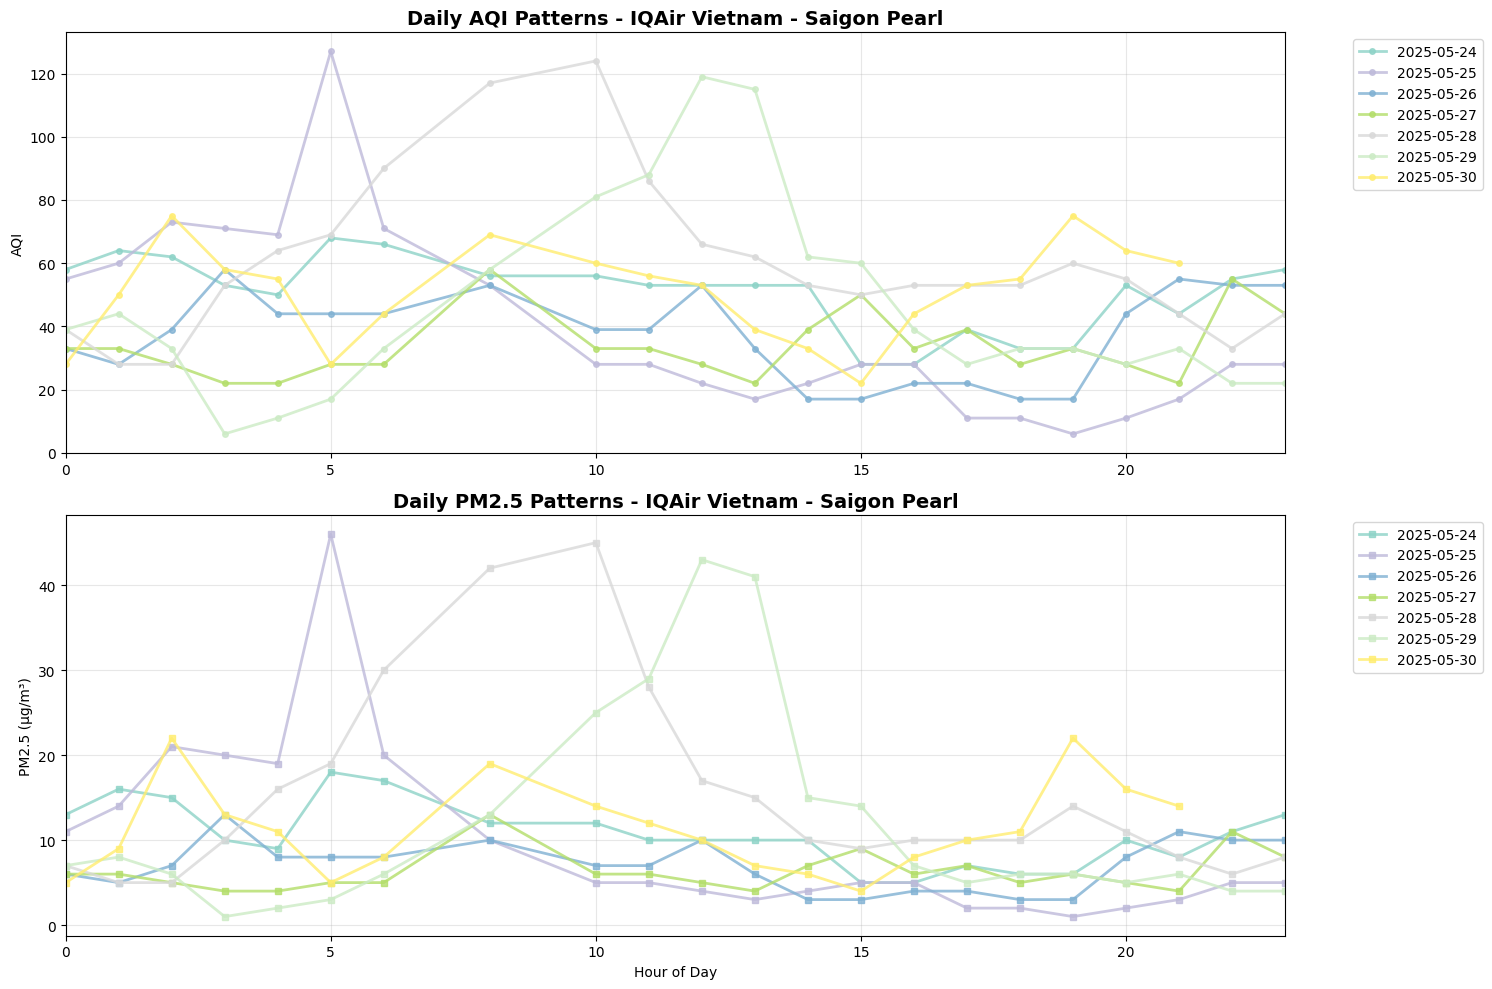

In [3]:
def plot_daily_patterns(df, station_name=None, metric='aqi', max_days=7):

    data = df[df['station_name'] == station_name].copy()
    title_suffix = f" - {station_name}"
    
    unique_dates = sorted(data['date'].unique())
    recent_dates = unique_dates[-max_days:]
    data_filtered = data[data['date'].isin(recent_dates)]
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(recent_dates)))
    
    #AQI plot
    for i, date in enumerate(recent_dates):
        day_data = data_filtered[data_filtered['date'] == date]
        if len(day_data) > 0:
            hourly_data = day_data.groupby('hour')['aqi'].mean().reset_index()
            axes[0].plot(hourly_data['hour'], hourly_data['aqi'], 
                        marker='o', label=str(date), linewidth=2, 
                        markersize=4, color=colors[i], alpha=0.8)
    
    axes[0].set_title(f'Daily AQI Patterns{title_suffix}', fontweight='bold', fontsize=14)
    axes[0].set_ylabel('AQI')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(0, 23)
    
    #PM2.5 plots
    for i, date in enumerate(recent_dates):
        day_data = data_filtered[data_filtered['date'] == date]
        if len(day_data) > 0:
            hourly_data = day_data.groupby('hour')['PM2.5 (µg/m³)'].mean().reset_index()
            axes[1].plot(hourly_data['hour'], hourly_data['PM2.5 (µg/m³)'], 
                        marker='s', label=str(date), linewidth=2, 
                        markersize=4, color=colors[i], alpha=0.8)
    
    axes[1].set_title(f'Daily PM2.5 Patterns{title_suffix}', fontweight='bold', fontsize=14)
    axes[1].set_xlabel('Hour of Day')
    axes[1].set_ylabel('PM2.5 (µg/m³)')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(0, 23)
    
    plt.tight_layout()
    plt.show()

stations = df['station_name'].unique()

for station in stations:
    print(f"\n{station} ")
    plot_daily_patterns(df, station, max_days=7)

In [4]:
def plot_individual_station_patterns(df, station_name):
    station_data = df[df['station_name'] == station_name].copy()

    hourly_stats = station_data.groupby('hour').agg({
        'aqi': ['mean', 'std', 'count'],
        'PM2.5 (µg/m³)': ['mean', 'std', 'count']
    }).reset_index()
    
    hourly_stats.columns = ['hour', 'aqi_mean', 'aqi_std', 'aqi_count', 
                           'pm25_mean', 'pm25_std', 'pm25_count']
    
    #Fill Nan values
    hourly_stats['aqi_std'] = hourly_stats['aqi_std'].fillna(0)
    hourly_stats['pm25_std'] = hourly_stats['pm25_std'].fillna(0)
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    #Plot AQI
    axes[0].plot(hourly_stats['hour'], hourly_stats['aqi_mean'], 
                'o-', linewidth=3, markersize=8, color='blue', label='Mean AQI')
    
    if hourly_stats['aqi_count'].min() > 1:
        axes[0].fill_between(hourly_stats['hour'],
                           hourly_stats['aqi_mean'] - hourly_stats['aqi_std'],
                           hourly_stats['aqi_mean'] + hourly_stats['aqi_std'],
                           alpha=0.3, color='blue', label='±1 Std Dev')
    
    axes[0].set_title(f'Hourly AQI Patterns - {station_name}', 
                     fontweight='bold', fontsize=14)
    axes[0].set_ylabel('AQI')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(0, 23)
    axes[0].set_xticks(range(0, 24, 2))
    
    #Plot PM2.5
    axes[1].plot(hourly_stats['hour'], hourly_stats['pm25_mean'], 
                's-', linewidth=3, markersize=8, color='purple', label='Mean PM2.5')
    
    if hourly_stats['pm25_count'].min() > 1:
        axes[1].fill_between(hourly_stats['hour'],
                           hourly_stats['pm25_mean'] - hourly_stats['pm25_std'],
                           hourly_stats['pm25_mean'] + hourly_stats['pm25_std'],
                           alpha=0.3, color='purple', label='±1 Std Dev')
    
    axes[1].set_title(f'Hourly PM2.5 Patterns - {station_name}', 
                     fontweight='bold', fontsize=14)
    axes[1].set_xlabel('Hour of Day')
    axes[1].set_ylabel('PM2.5 (µg/m³)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(0, 23)
    axes[1].set_xticks(range(0, 24, 2))
    
    plt.tight_layout()
    plt.show()

Hà Nội: Đại Học Bách Khoa cổng Parabol đường Giải Phóng (KK)


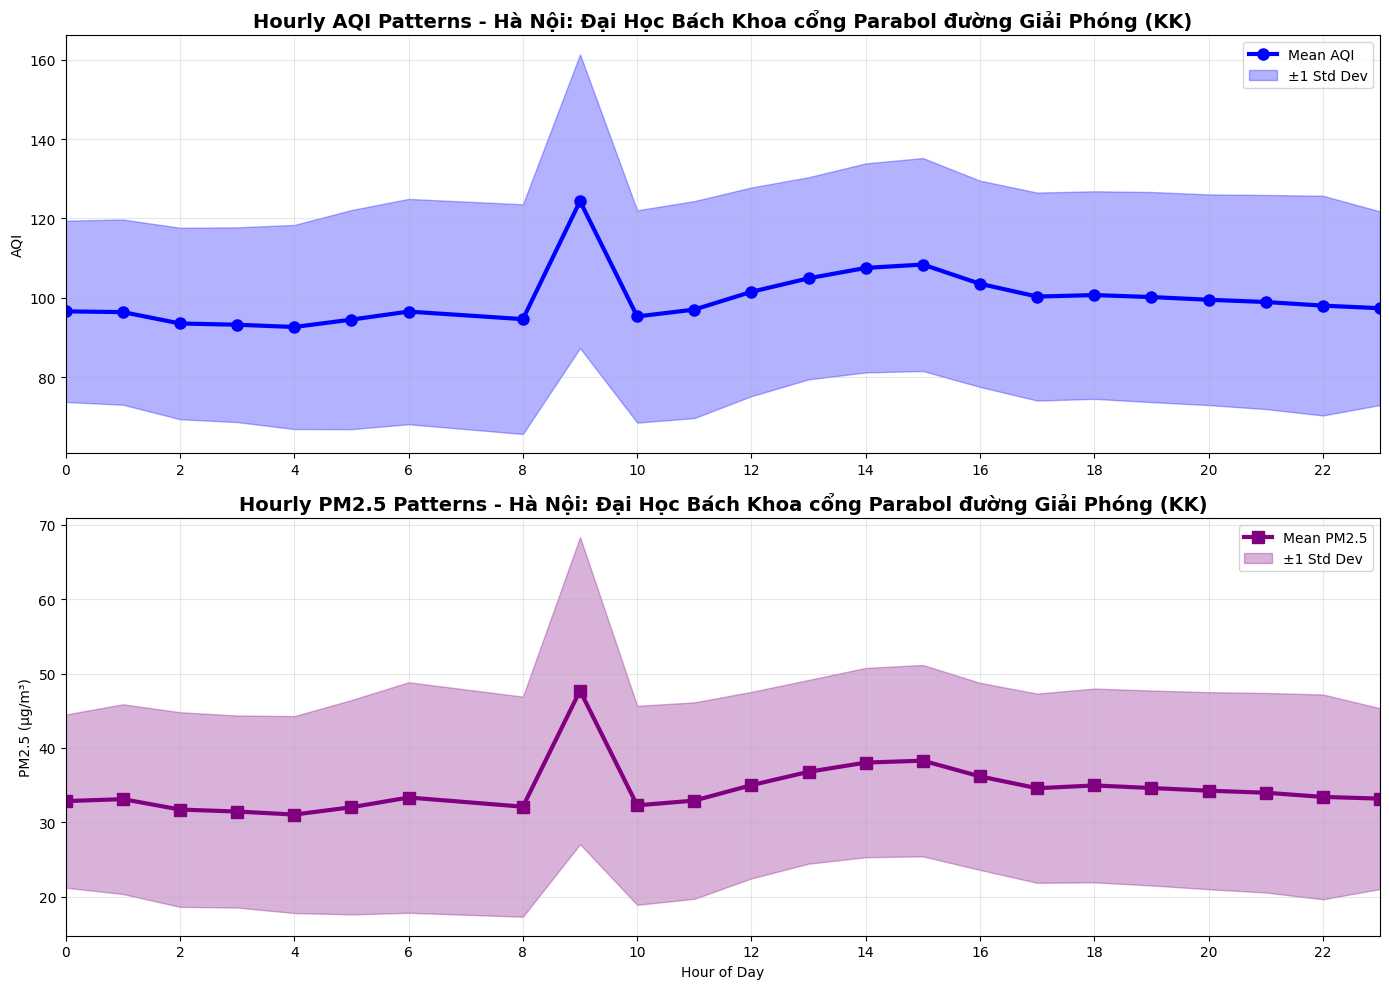

Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuất Duy Tiến (KK)


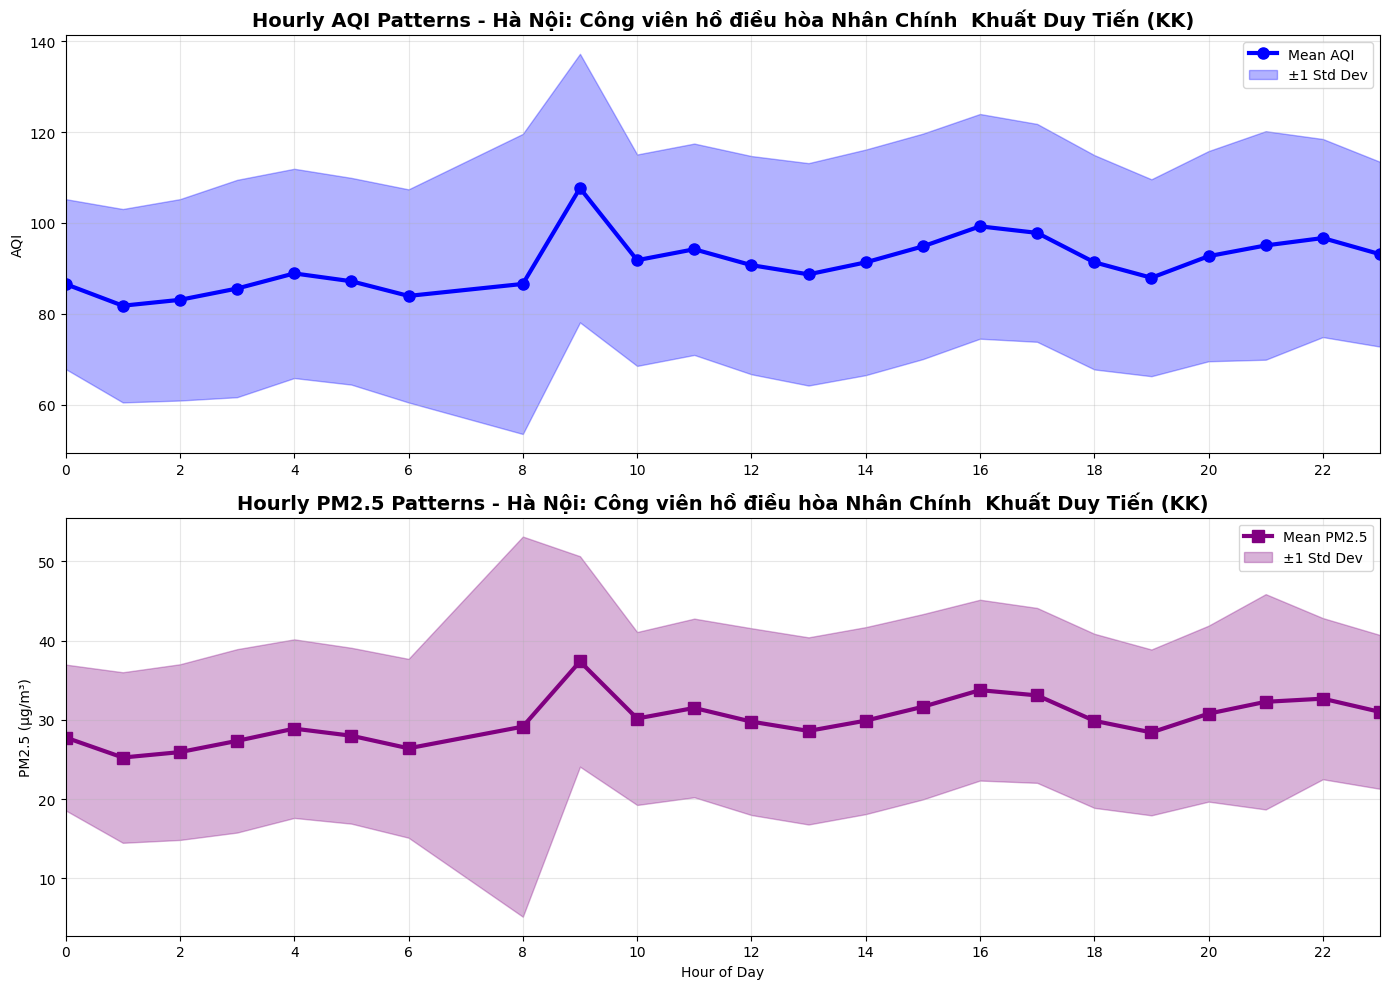

Minh Khai - Bắc Từ Liêm


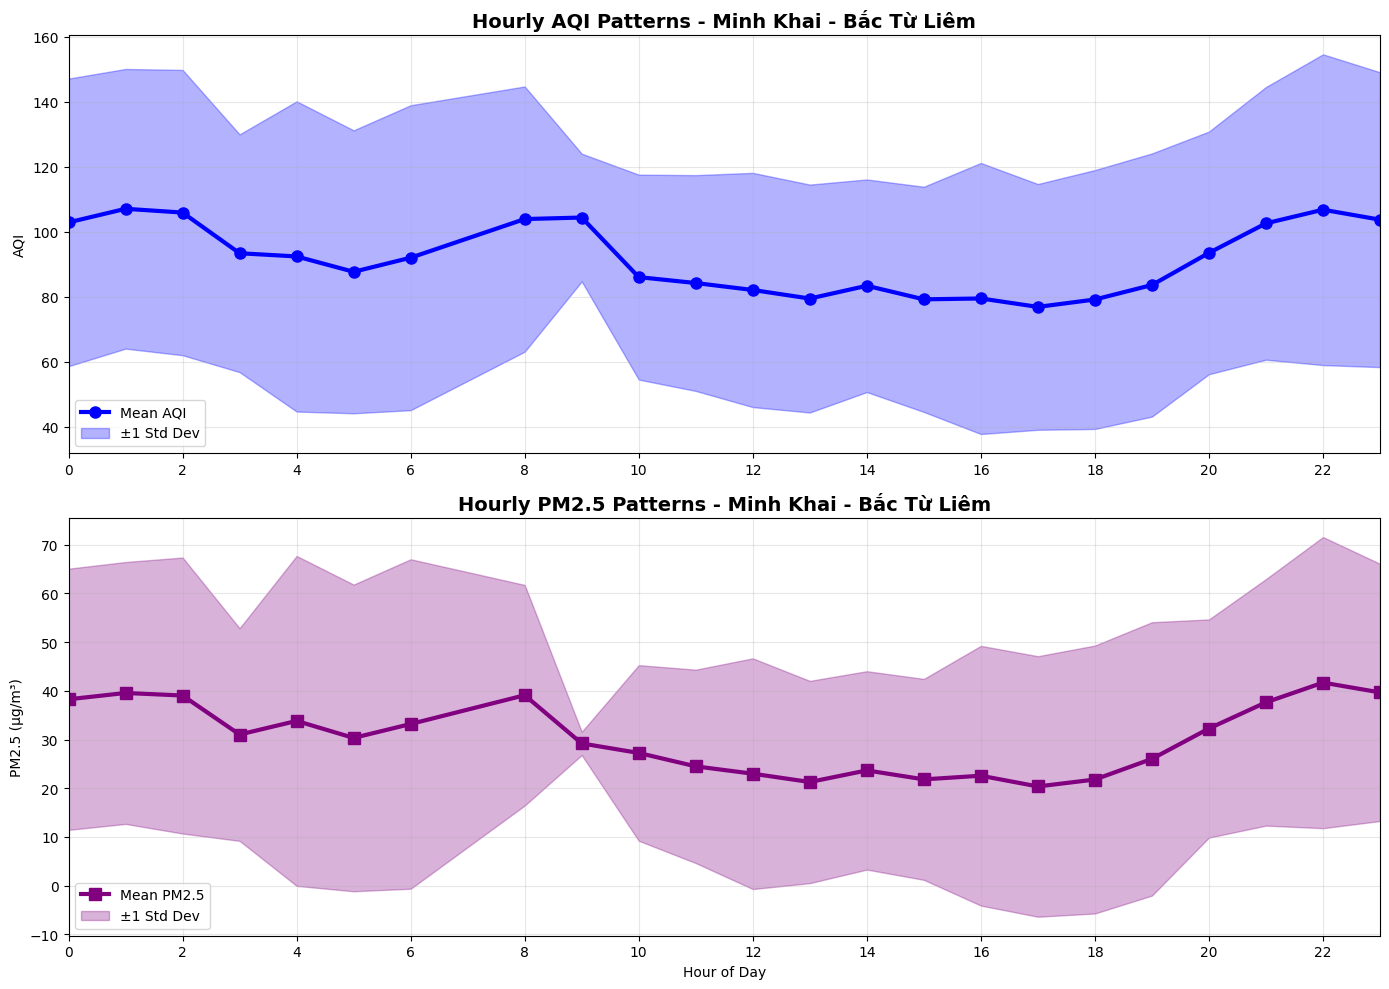

Vũng Tàu: Ngã tư Giếng nước - Tp.Vũng Tàu (KK)


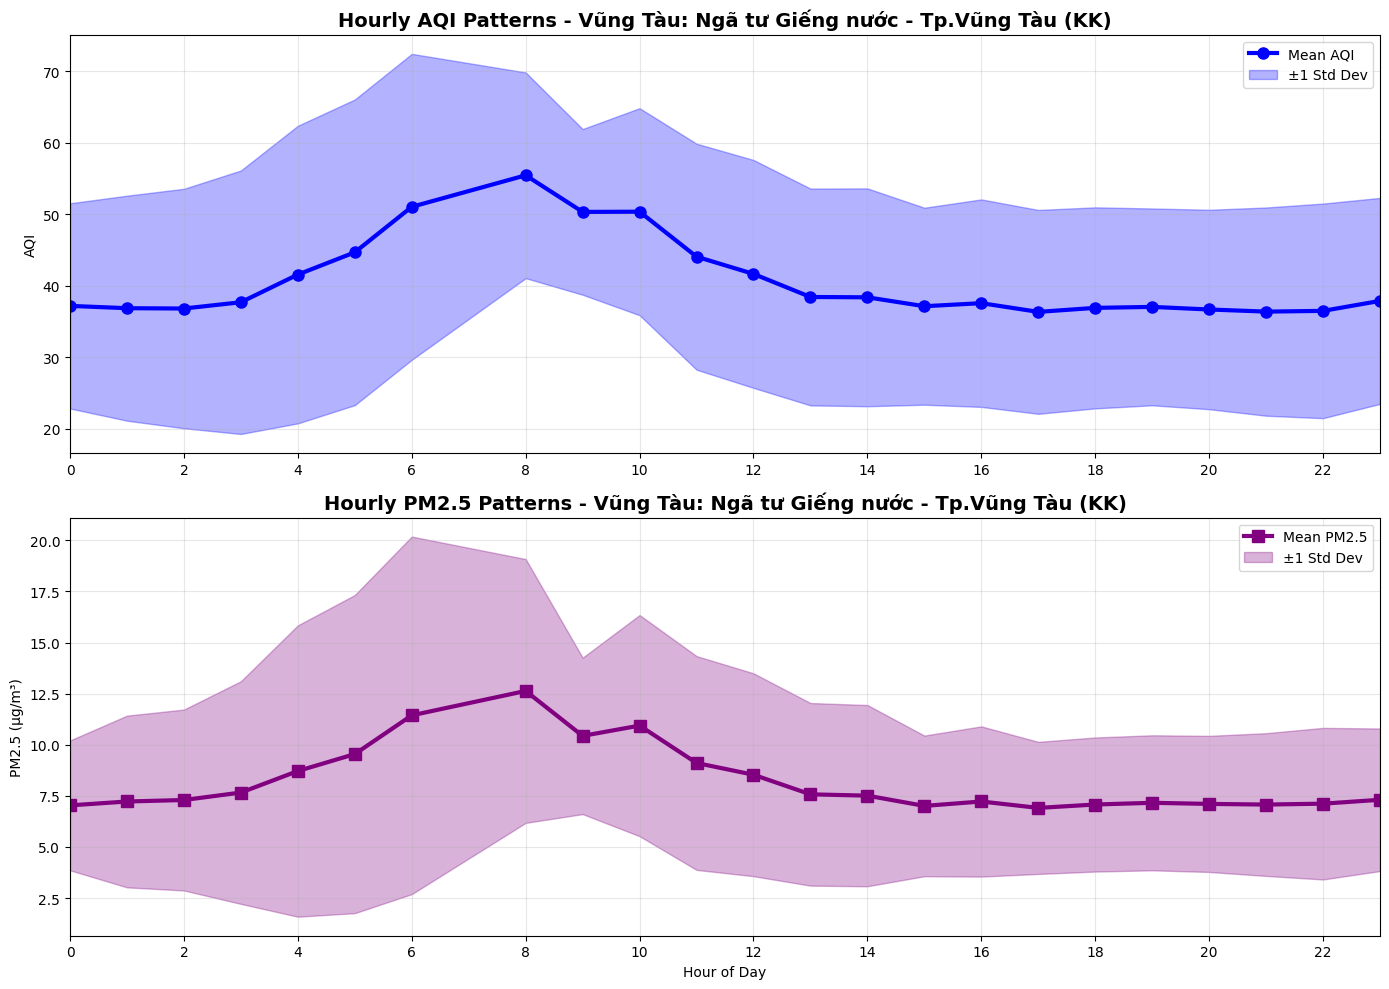

Hải Dương: UBND TP. Hải Dương - 106 Đường Trần Hưng Đạo (KK)


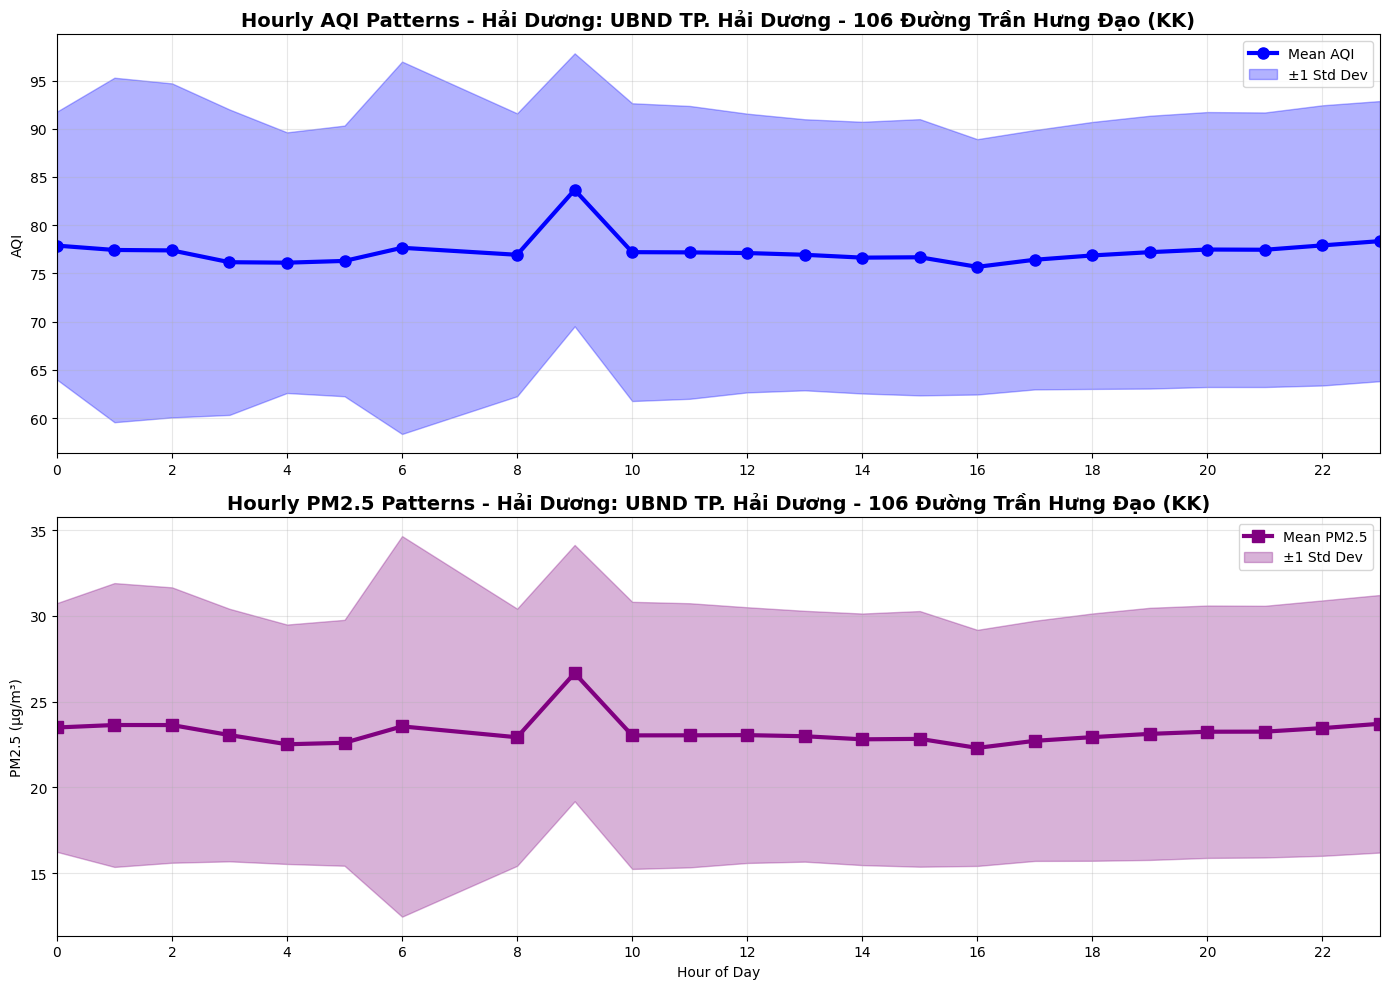

Thừa Thiên Huế: 83 đường Hùng Vương (KK)


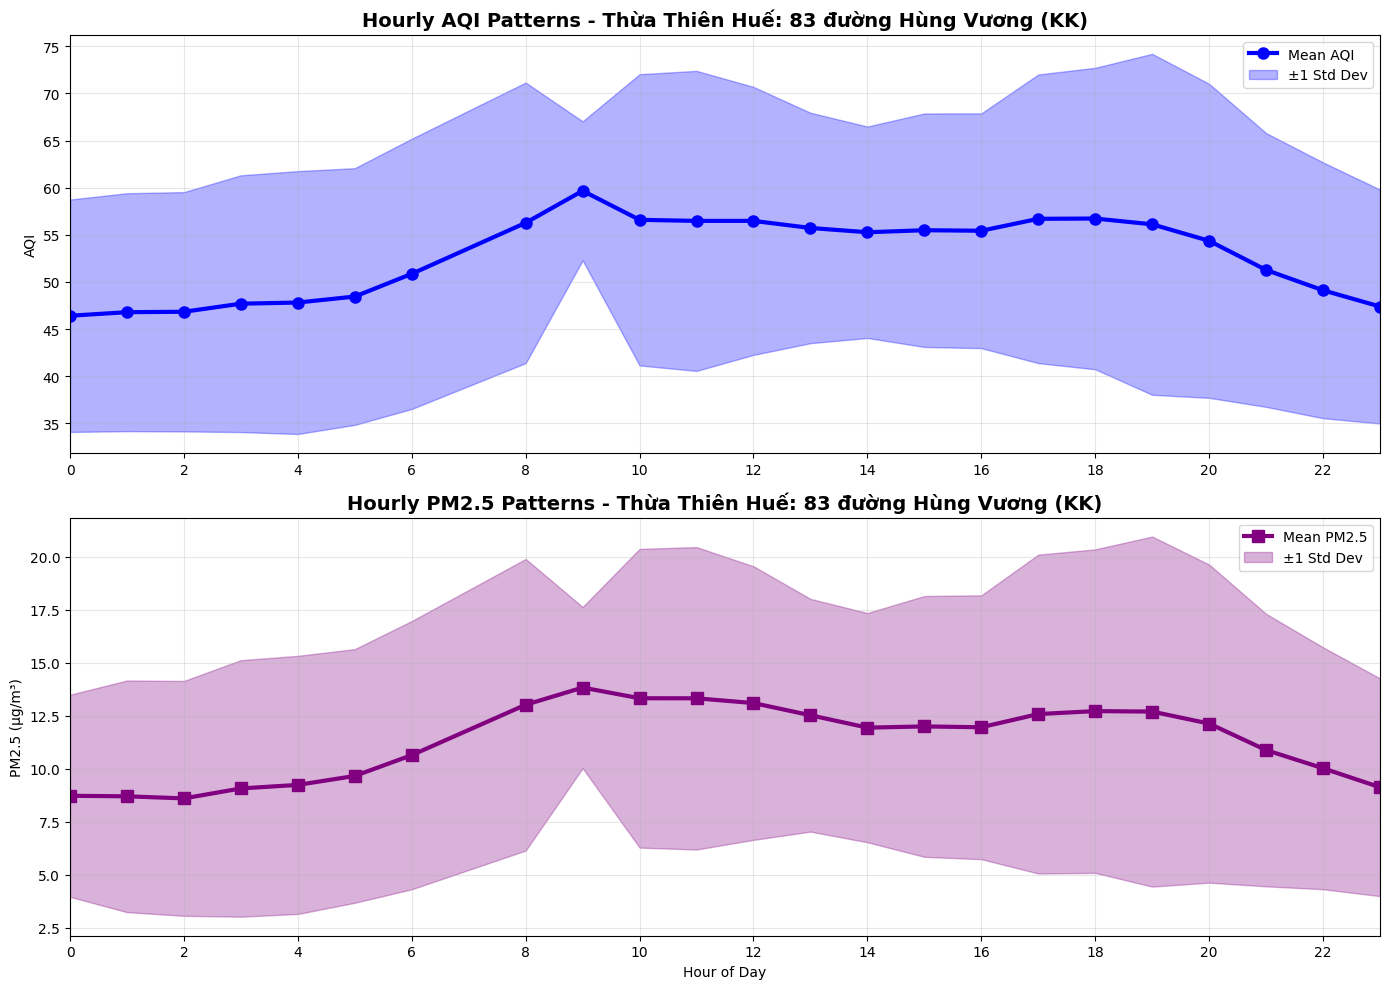

Thái Bình: Cầu Thái Bình - Đ. Trần Thái Tông - P. Bồ Xuyên - TP Thái Bình (KK)


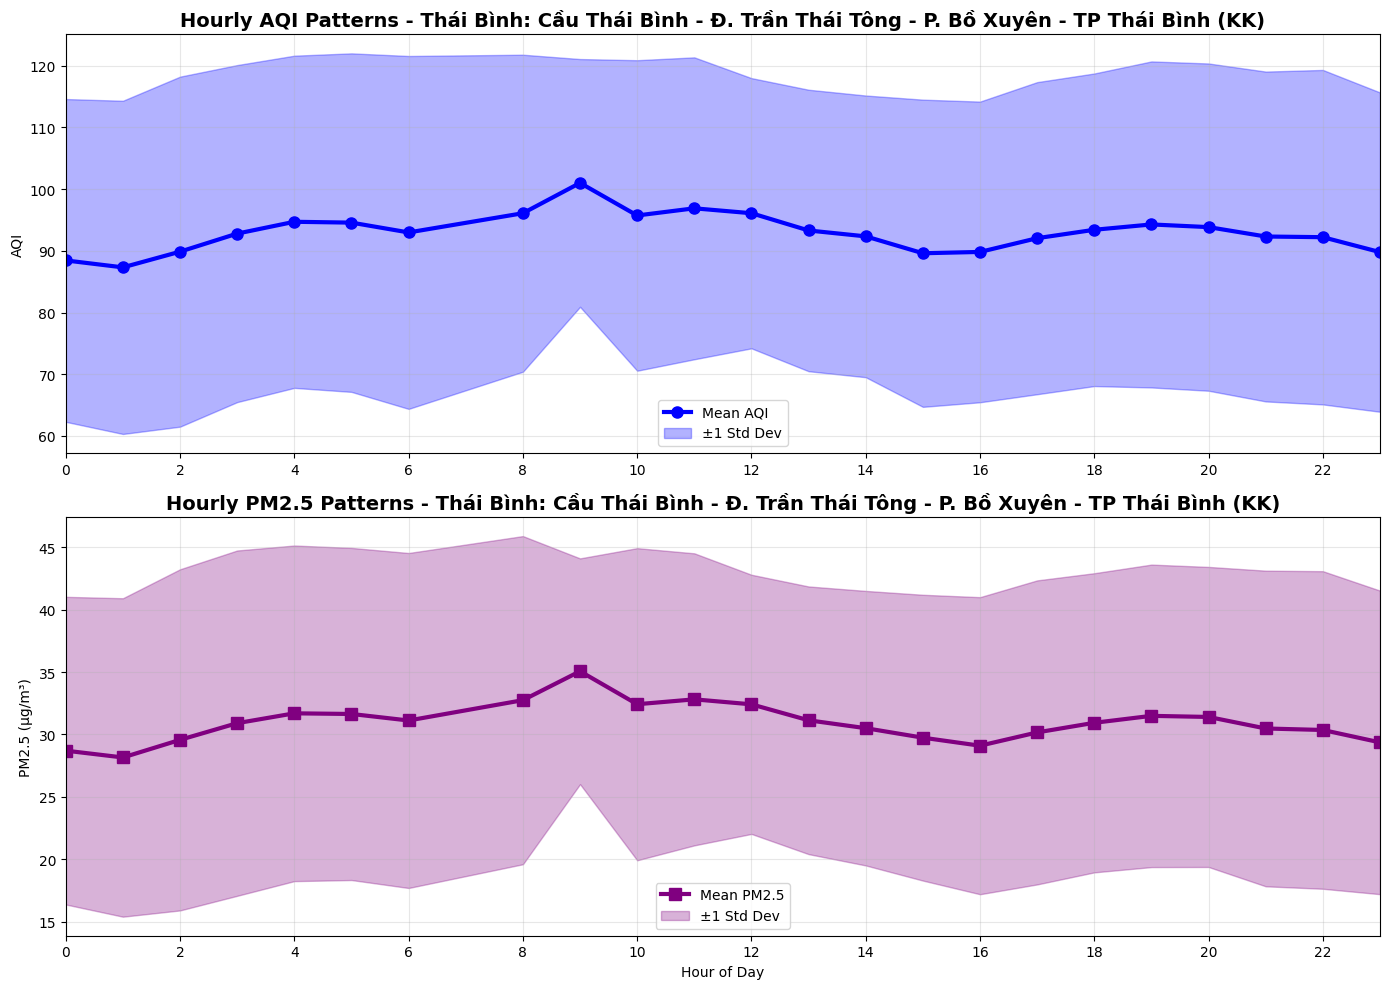

Thái nguyên: Đường Hùng Vương - Tp Thái Nguyên (KK)


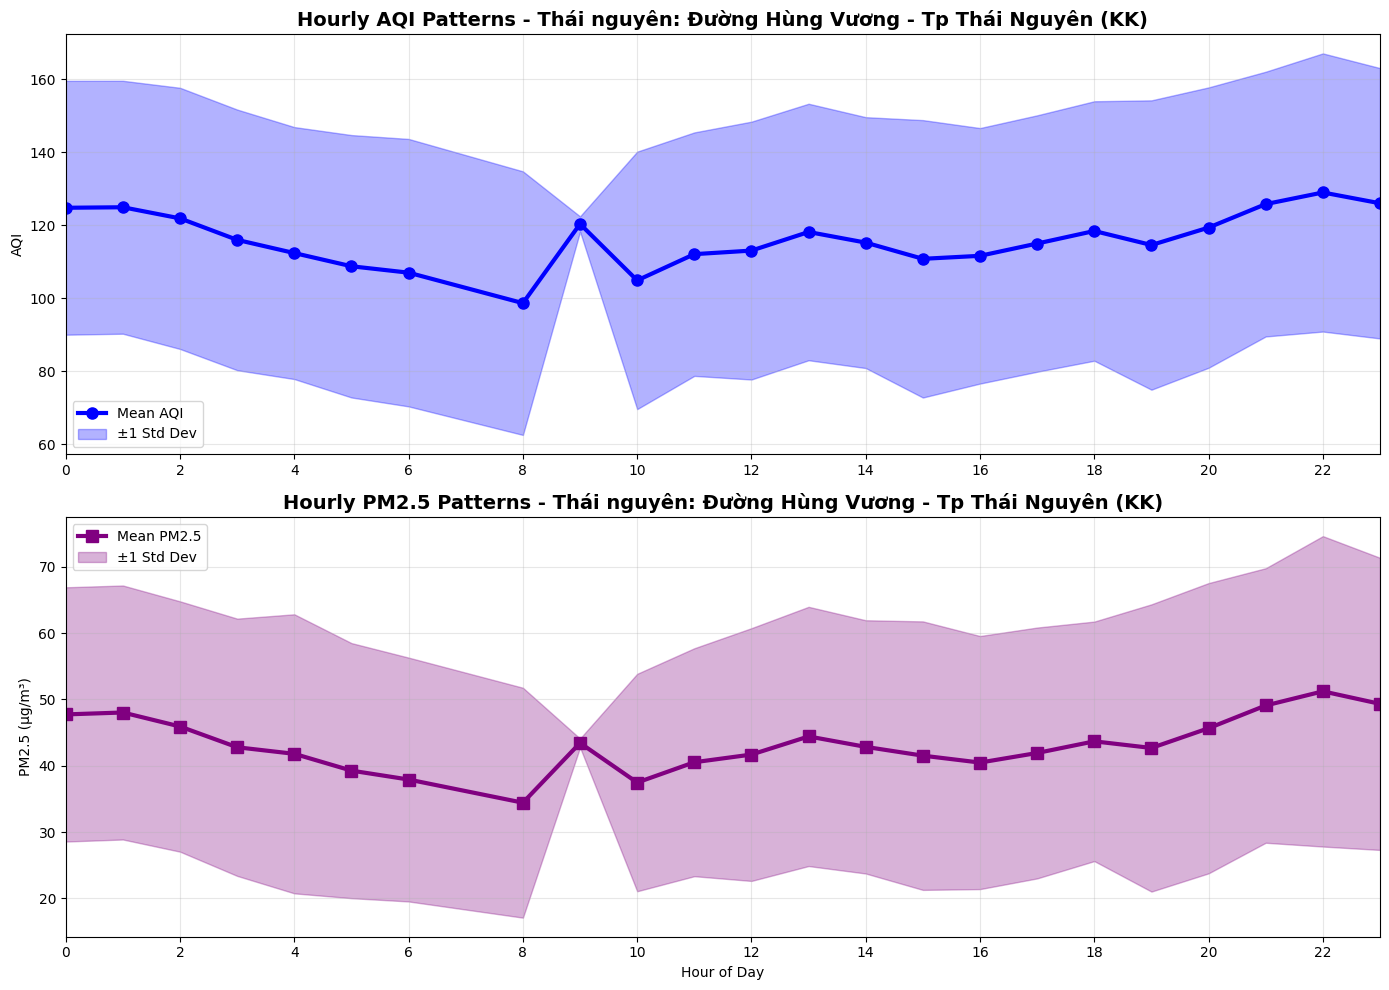

Quảng Bình: Khu kinh tế Hòn La (KK)


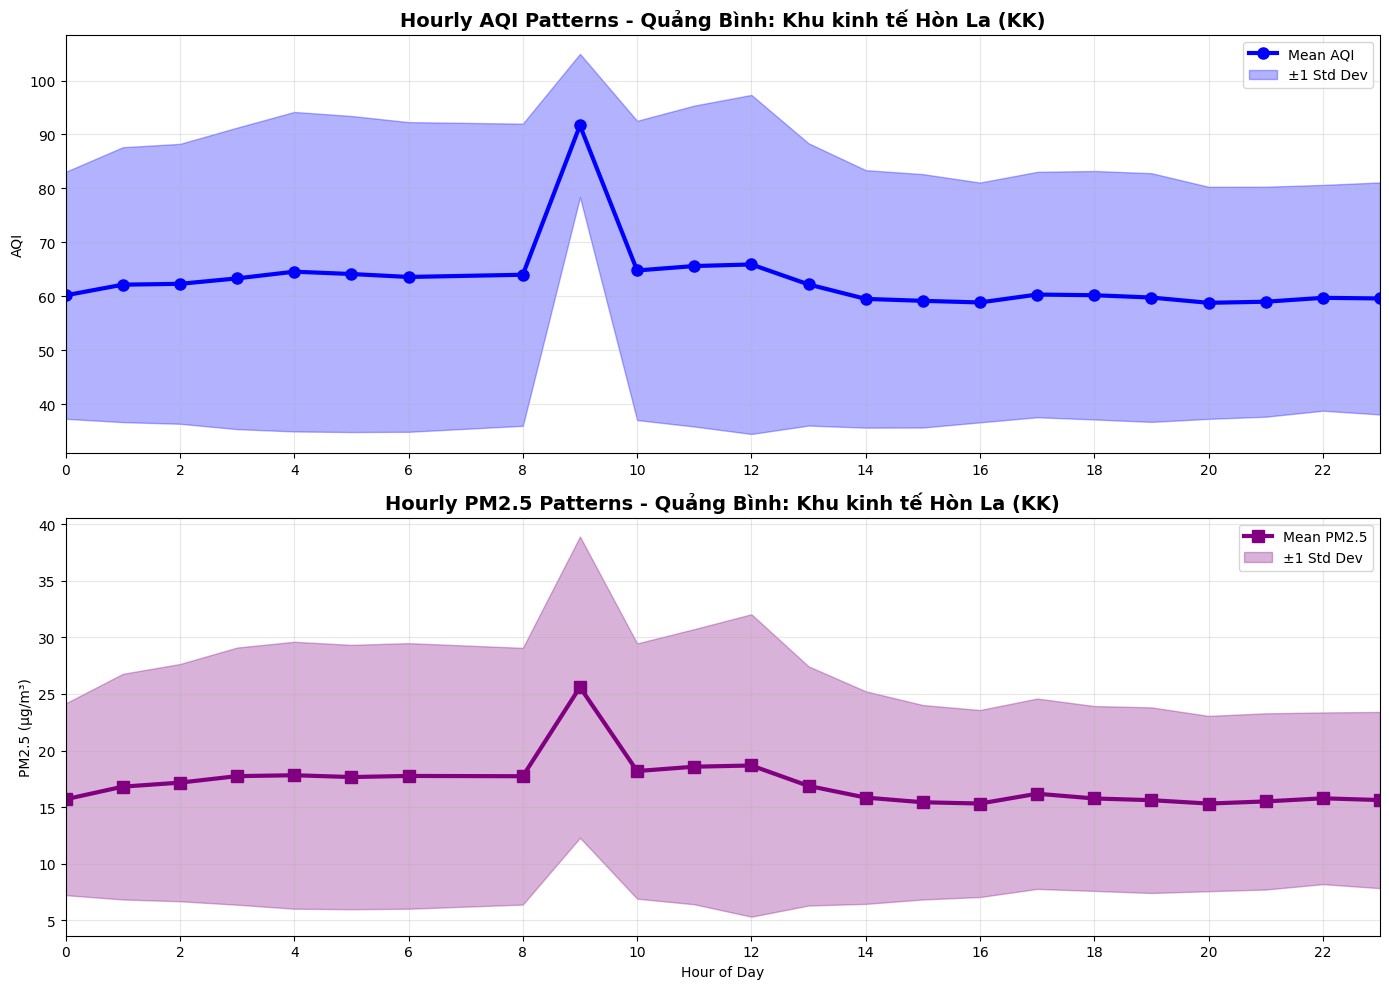

Trà Vinh: Tp. Trà Vinh (KK)


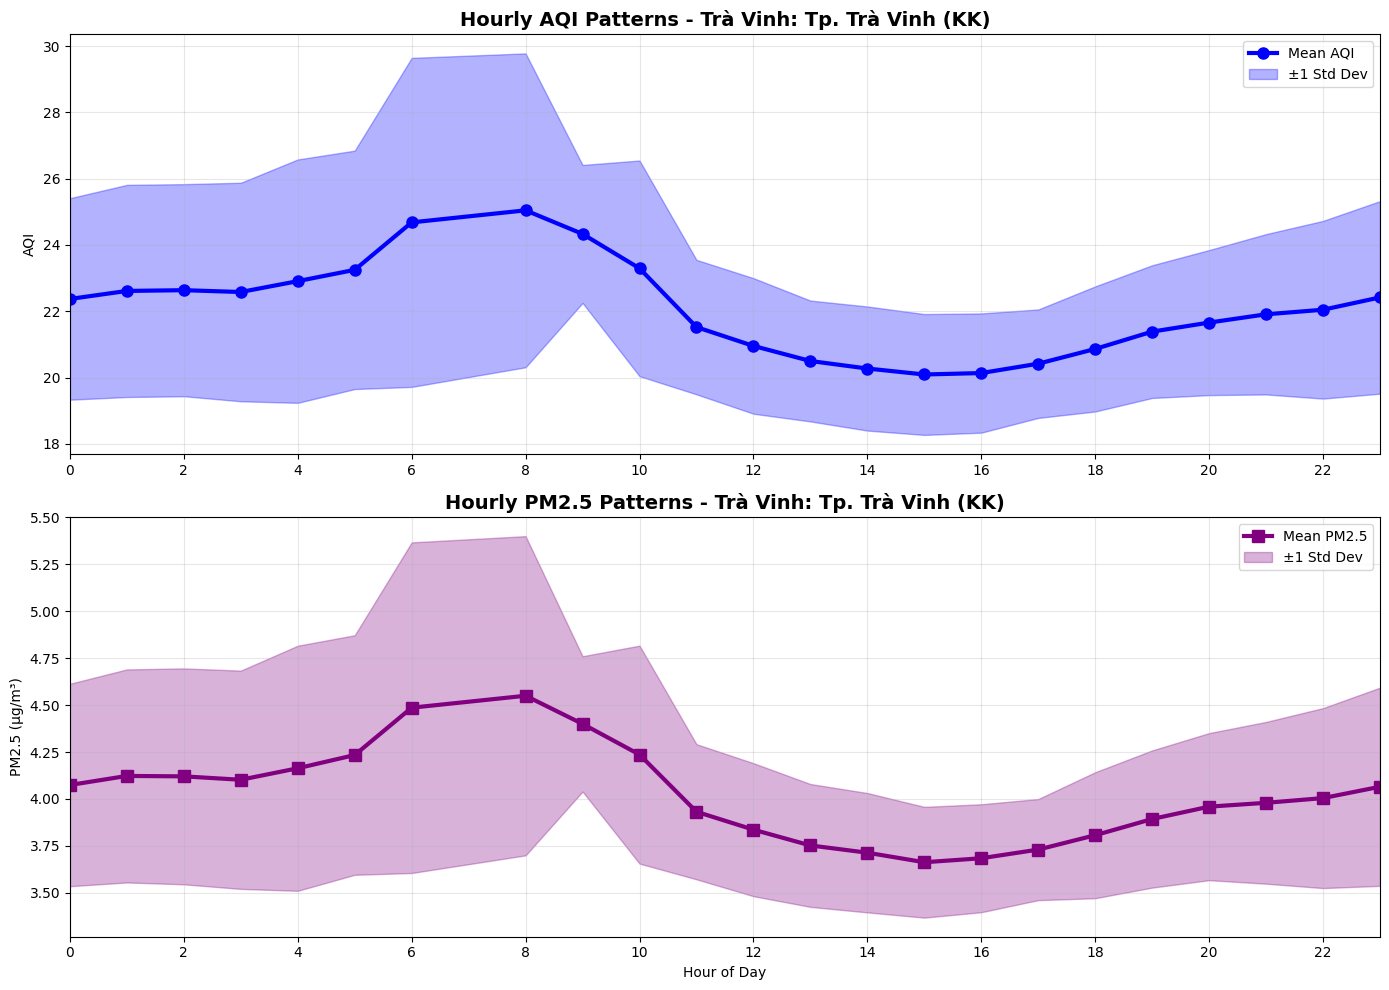

Hà Nội: Chi cục BVMT (KK)


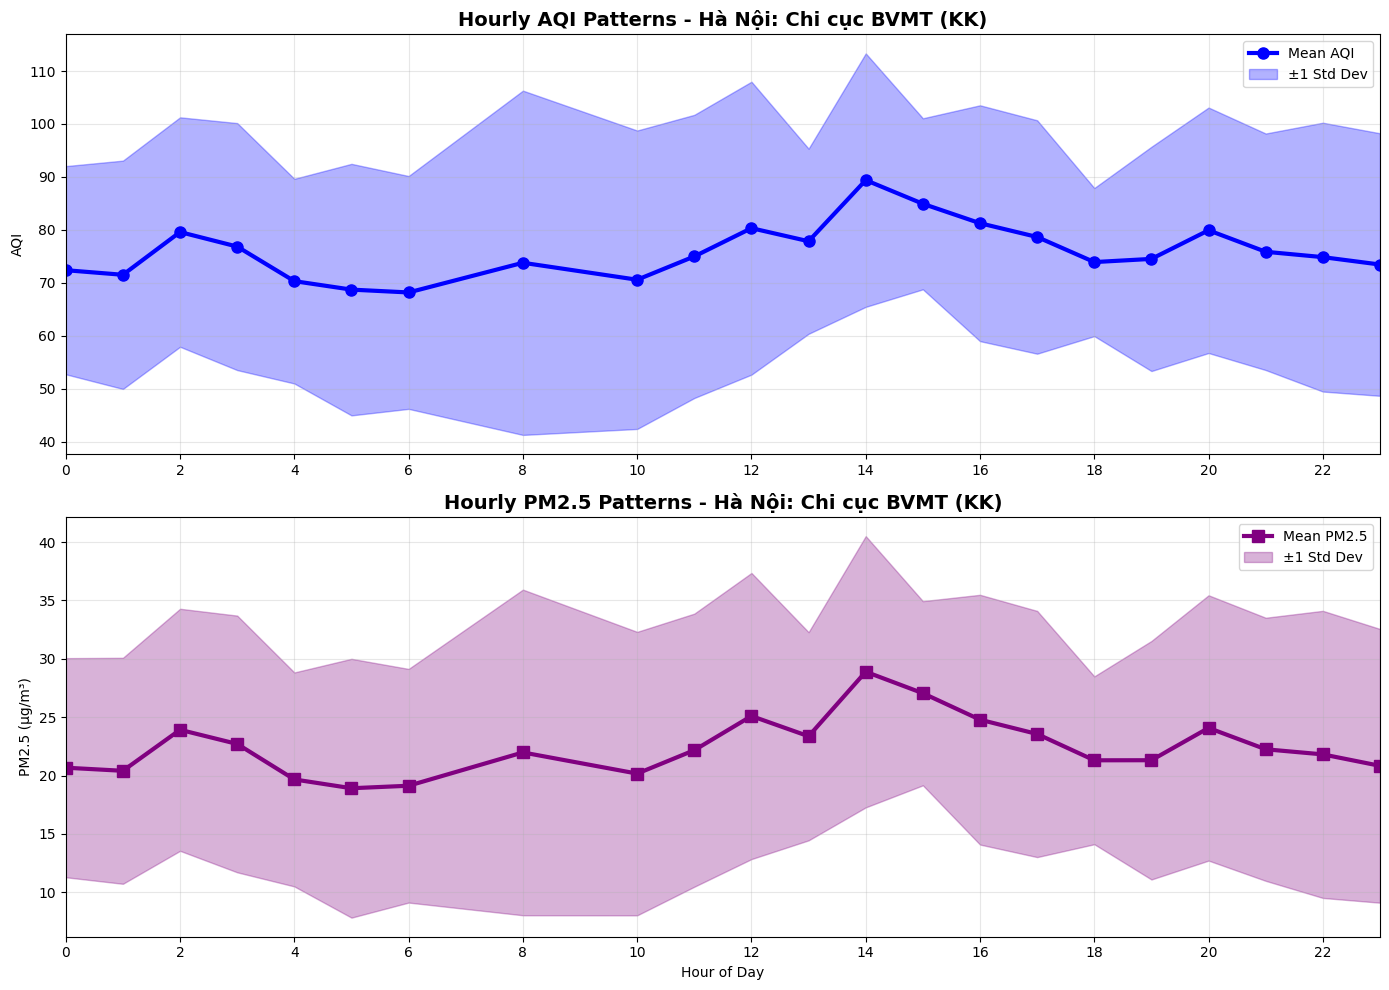

IQAir Ha Noi


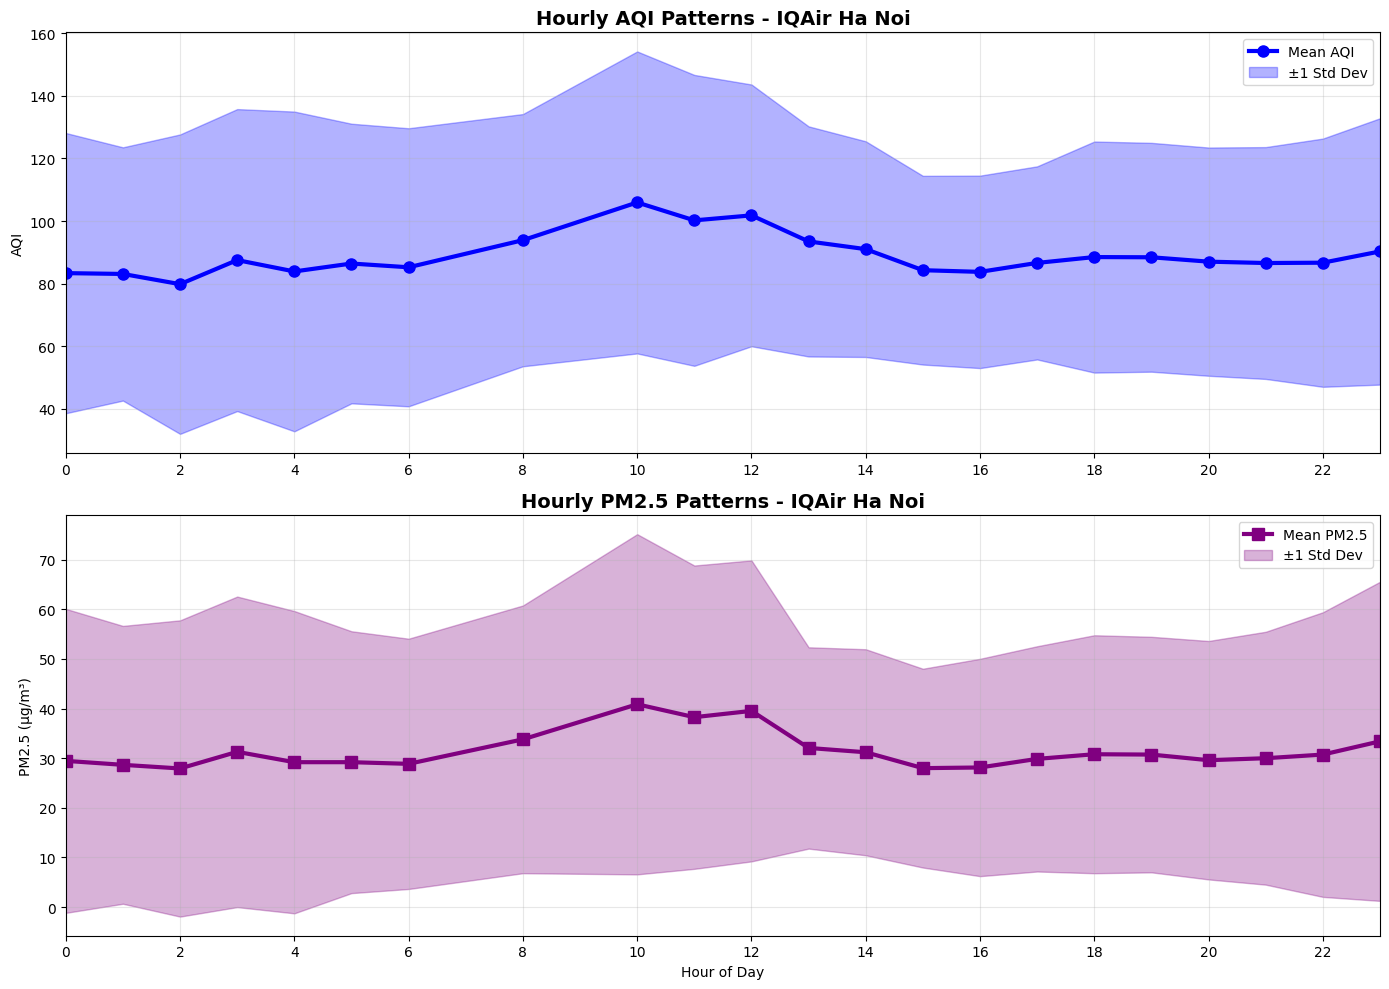

FPT


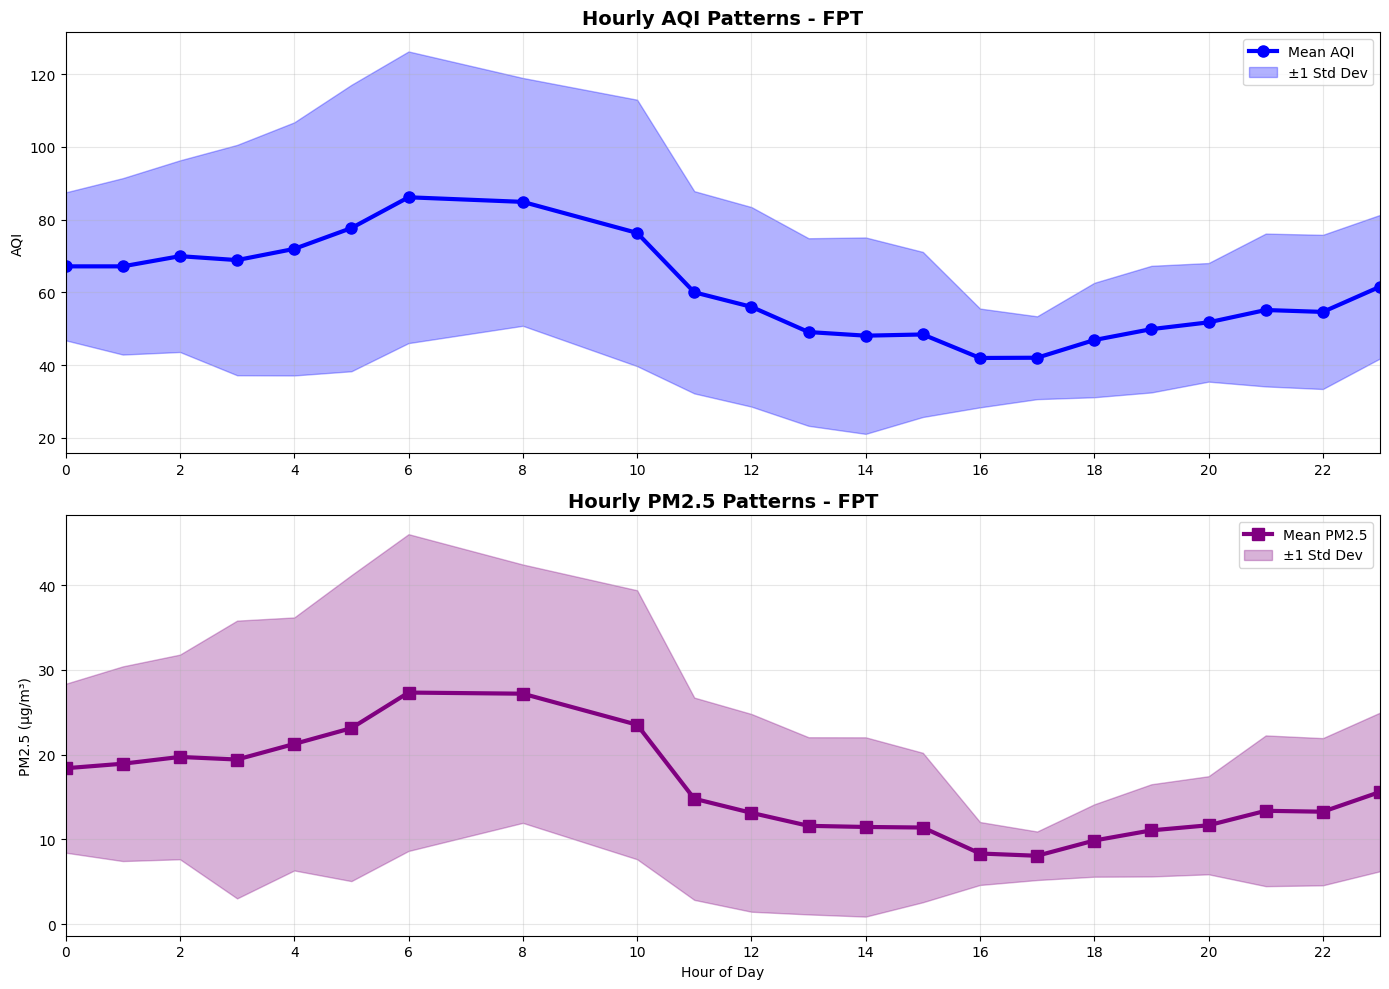

Hà Nội: TT giao lưu văn hóa phố cổ - Hoàn Kiếm - Trạm cảm biến(KK)


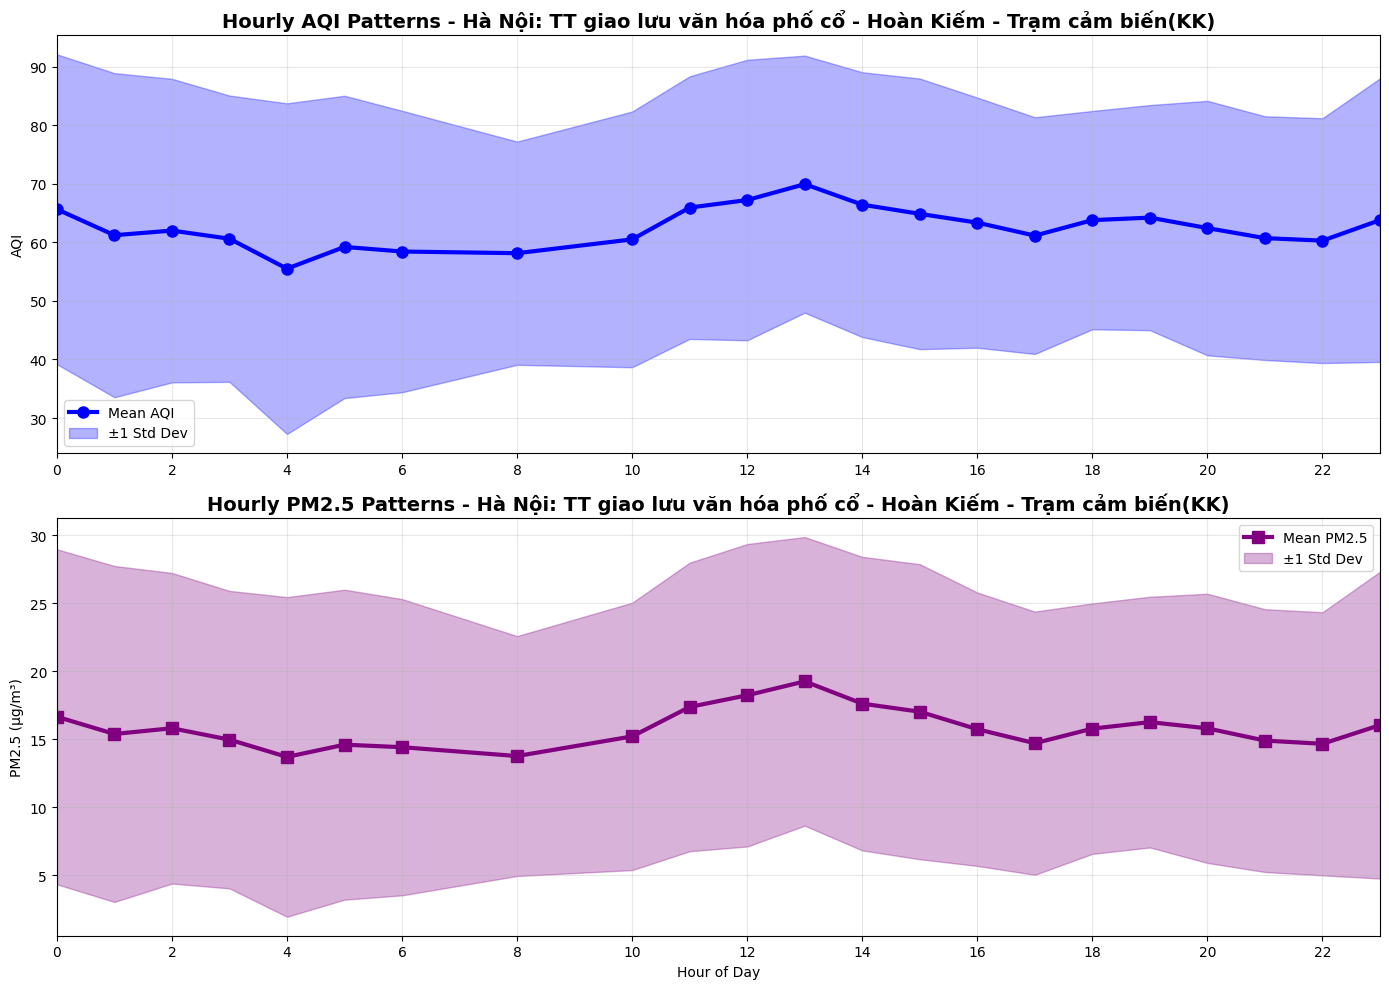

IQAir Vietnam - Saigon Pearl


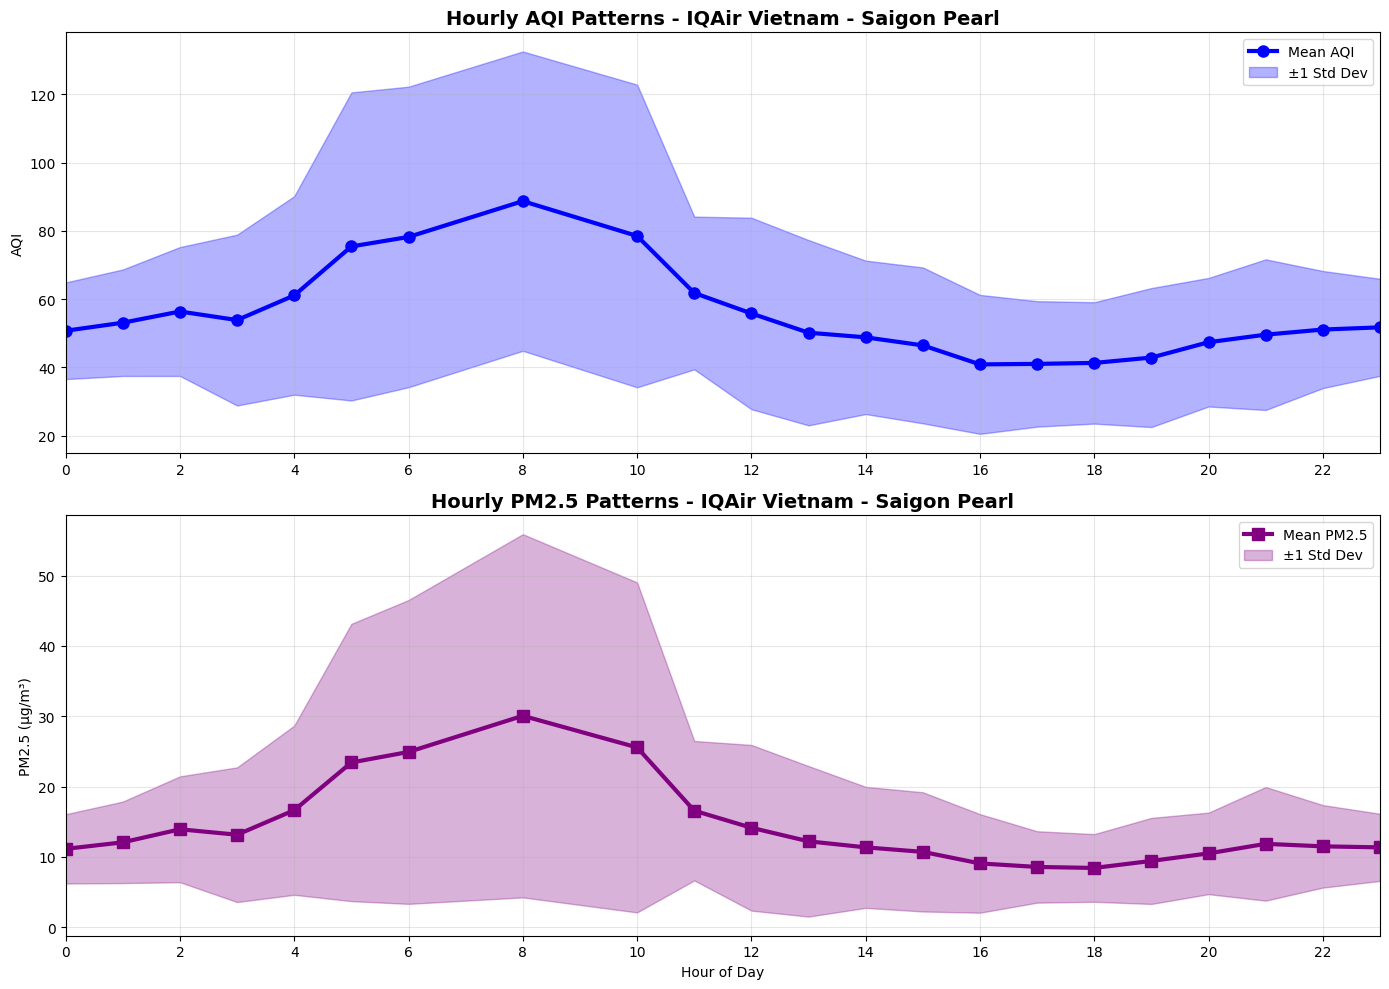

In [5]:
stations = df['station_name'].unique()

for i, station in enumerate(stations, 1):
    print(f"{station}")
    plot_individual_station_patterns(df, station)